# Анализ авторынка Казахстана в 2019 году

В датасете представлены данные о продажах новых автомобилей в Казахстане за первые 9 месяцев 2019 года. Необходимо проанализировать рынок и оценить позицию на рынке автоцентра Mercur Auto.  
Данные содержат много ошибок, поэтому особое внимание уделяется предобработке данных.

**Цель исследования:** изучить тенденции авторынка в Казахстане в 2019 году и опреелить позицию Mercur Auto.

Данные представлены файлом `autokz2019.csv` со следующими полями:

+ `Год` – год продажи (2019),
+ `Месяц` – месяц продажи,
+ `Компания` – название автоцентра,
+ `Бренд` – название продаваемой марки автомобиля,
+ `Модель` – название модели автомобиля,
+ `Модификация` – модификация модели автомобиля,
+ `Год выпуска` – год производства автомобиля,
+ `Страна-производитель` – страна, где произведен автомобиль,
+ `Вид топлива` – какое топливо используется в автомобиле (бензин, дизель, электричество, гибрид),
+ `Объём двиг л` – объем двигателя автомобиля в литрах,
+ `Коробка передач` – тип коробки переключения передач,
+ `Тип привода` - тип привода автомобиля,
+ `Сегмент` – сегмент, к которому относится авто,
+ `Регион` – регион продажи,
+ `Наименование дилерского центра` – совпадает с компанией,
+ `Тип клиента` – юридическое или физическое лицо,
+ `Форма расчета` – наличный и безналичный расчет,
+ `Количество` – количество автомобилей в заказе,
+ `Цена USD` – цена автомобиля,
+ `Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок, если есть),
+ `Область` – область продажи,
+ `Сегментация 2013` – сегмент автомобиля актуальный,
+ `Класс 2013` – класс автомобиля актуальный,
+ `Сегментация Eng` – английская сегментация,
+ `Локализация производства`

Исследование будет проходить по следующему плану:
1. Импорт библиотек и загрузка данных
2. Предобработка данных
    - Удаление и переименование полей,
    - Изменение типов данных,
    - Обработка пропусков,
    - Обработка дубликатов,
    - Добавление нового столбца
    - Выводы по разделу
3. Исследовательский анализ данных
    - Анализ количественных признаков
    - Анализ категориальных признаков
    - Выводы по разделу
4. Анализ рынка
    - Общие показатели
    - Анализ некоммерческого сегмента
    - Анализ коммерческого сегмента
5. Анализ показателей эффективности Mercur Auto
6. Выводы

## Импорт библиотек и загрузка данных

In [6]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5.5,4.5]
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False,\
    "axes.spines.top": False})
import numpy as np
import re
import os
import warnings
warnings.filterwarnings("ignore")

In [7]:
url = 'https://drive.google.com/file/d/1mhLHHLDNLGInBXx3GRwlUCcuYbAEvdLH/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep = ';', decimal = ',')

Выведем на экран информацию об исходном датасете.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

In [10]:
pd.set_option('display.max_columns', None)
df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


Некоторые поля необходимо удалить в виду большого количества пропусков или отсутствия целесообразности (дублируют информацию из других полей). Также для удобства кодинга переименуем поля на английские названия:
+ `Год` -> `year`,
+ `Месяц` -> `month`,
+ `Компания` -> `company`,
+ `Бренд` -> `brand`,
+ `Модель` -> `model`,
+ `Год выпуска` -> `model_year`,
+ `Страна-производитель` -> `country`,
+ `Вид топлива` -> `fuel`,
+ `Объем двиг, л` -> `engine_size`,
+ `Коробка передач` -> `transmission`,
+ `Тип привода` -> `drive_type`,
+ `Сегментация 2013` -> `segment`,
+ `Регион` -> `city`,
+ `Количество` -> `amount`,
+ `Цена, USD` -> `car_price, USD`,
+ `Продажа, USD` -> `order_price, USD`,
+ `Область` -> `region`

Тип данных столбца `model_year` представим в виде целого числа. Тип данных в столбце `engine_size` сменим с текстового на вещественное число. В поле `amount` сменим тип данных на целое число, т.к. количество авто в заказе - дискретная переменная.

В столбцах `model_year`, `fuel`, `engine_size`, `transmission`, `drive_type`, `amount` есть пропуски.

Добавим столбец с датой продажи, исходя из данных полей `year` и `month`.  
Цены в столбце `order_price, USD` представлены сотнями тысяч $,  при аггрегации достигают сотен миллионов, что неудобно для визуализации и чтения графиков, поэтому создадим столбец с ценой, деленной на 1 млн.

## Предобработка данных

### Удаление и переименование полей

Удалим ненужные поля.

In [18]:
df = df.drop(['Наименование дилерского центра','Форма расчета','Сегмент','Класс 2013',\
'Сегментация Eng', 'Локализация производства', 'Тип клиента', 'Модификация'], axis =1)

Переименуем поля на английский.

In [20]:
columns = df.columns.to_list()
new_columns = ['year','month','company','brand','model','model_year','country','fuel','engine_size'\
    ,'transmission', 'drive_type','city', 'amount','car_price, USD','order_price, USD','region','segment']
dict = dict(zip(columns, new_columns))
df = df.rename(columns = dict)

Проверим датафрейм после операций.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              39966 non-null  int64  
 1   month             39966 non-null  object 
 2   company           39966 non-null  object 
 3   brand             39966 non-null  object 
 4   model             39966 non-null  object 
 5   model_year        39465 non-null  object 
 6   country           39966 non-null  object 
 7   fuel              36826 non-null  object 
 8   engine_size       35708 non-null  object 
 9   transmission      36711 non-null  object 
 10  drive_type        35677 non-null  object 
 11  city              39966 non-null  object 
 12  amount            39960 non-null  float64
 13  car_price, USD    39966 non-null  float64
 14  order_price, USD  39966 non-null  float64
 15  region            39966 non-null  object 
 16  segment           39966 non-null  object

In [23]:
df.head(3)

,year,month,company,brand,model,model_year,country,fuel,engine_size,transmission,drive_type,city,amount,"car_price, USD","order_price, USD",region,segment
0,2019,Май,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили
1,2019,Август,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили
2,2019,Апрель,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Алматы,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили


Успешно.

### Изменение типов данных

Преобразуем тип данных в столбце с датой производства.

In [27]:
df['model_year'] = df['model_year'].str.replace('\xa0', '')

In [28]:
df['model_year'] = df['model_year'].astype('Int16')

Изменим тип данных поля с объемом двигателя.
Pandas не дает это сделать просто так, т.к. значения кроме цифр, имеют также буквы. Перед изменением типа данных, уберем текст из значений, а в качестве разделителя дробной части установим точку вместо запятой.

In [30]:
df['engine_size'] = df['engine_size'].replace(',','.', regex = True)

In [31]:
df['engine_size'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '1.4 Turbo', '2.5', '1.6', nan, '2.8', '4.3', '4.3.',
       '1.6 MPI', '2.0 MPI', '2.4 GDI', '2.4 MPI', '2.5 CRDI VGT',
       '2.5 CRDI WGT', '3.9', '7.5', '12.3', '1.6 T-GDI', '2.0 CRDI',
       '2.0', '3.5', '5.6', '5.2', '3.0 L', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '2.7 ', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8',
       '11', '2.2', '1.2', '1.485', 'MT', 'AT', '0', '13', '1.33', '#Н/Д',
       '4.0', '2.4G', '2.693', '3.8', '1.2T', '3.6', '7.6', '4.9', '2.0h',
       '2.9', '400 Л.С.', '4.98 L.', '4.98', '88 KWH', '8.4 L.', '6.7L',
       '6.5'], dtype=object)

Создадим функцию, которая сохраняет только число из значения.

In [33]:
def clean_size(row):
    if re.search(r'\d+\.\d+', str(row)):
        return re.search(r'\d+\.\d+', str(row)).group()
    else:
        pass

In [34]:
df['engine_size'] = df['engine_size'].apply(clean_size)

In [35]:
df['engine_size'].unique()

array(['1.4', None, '4.4', '6.6', '1.5', '1.596', '2.4', '1.7', '26.7',
       '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7', '18.7',
       '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7', '10.7',
       '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7', '6.2',
       '2.5', '1.6', '2.8', '4.3', '2.0', '3.9', '7.5', '12.3', '3.5',
       '5.6', '5.2', '3.0', '1.598', '1.248', '1.998', '2.359', '1.999',
       '3.342', '1.591', '3.47', '1.69', '1.774', '4.6', '1.8', '10.5',
       '5.5', '12.8', '2.2', '1.2', '1.485', '1.33', '4.0', '2.693',
       '3.8', '3.6', '7.6', '4.9', '2.9', '4.98', '8.4', '6.5'],
      dtype=object)

Применяем функцию для преобразования типа данных во float.

In [37]:
df['engine_size'] = pd.to_numeric(df['engine_size'])

Преобразуем тип данных с количеством заказов в целое число.

In [39]:
df['amount'] = df['amount'].astype('Int8')

Преобразование типов данных завершено.

### Обработка пропусков

Рассмотрим пропуски в столбце `model_year`

In [43]:
my_na = df[df['model_year'].isna()]
my_na.head()

,year,month,company,brand,model,model_year,country,fuel,engine_size,transmission,drive_type,city,amount,"car_price, USD","order_price, USD",region,segment
65,2019,Июнь,Автоцентр-Бавария,BMW,7 серия,<NA>,Германия,Бензин,NaN,АКПП,Полный,Усть-Каменогорск,1,93520.28222,93520.28222,Восточно-Казахстанская область,Легковые автомобили
9599,2019,Май,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,<NA>,Республика Казахстан,Дизель,NaN,NaN,2WD,Алматы,1,33833.35184,33833.35184,г.Алматы,Коммерческие автомобили
9600,2019,Май,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,<NA>,Республика Казахстан,Дизель,NaN,NaN,2WD,Алматы,1,33833.35184,33833.35184,г.Алматы,Коммерческие автомобили
9601,2019,Май,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,<NA>,Республика Казахстан,Дизель,NaN,NaN,2WD,Алматы,1,33833.35184,33833.35184,г.Алматы,Коммерческие автомобили
9602,2019,Май,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,H350,<NA>,Республика Казахстан,Дизель,NaN,NaN,2WD,Алматы,1,33833.35184,33833.35184,г.Алматы,Коммерческие автомобили


In [44]:
print(f'В данном столбце {len(my_na)} пропуск. Доля пропусков составляет {round(len(my_na)/len(df),4)*100}%')

В данном столбце 501 пропуск. Доля пропусков составляет 1.25%


Учитывая то, что одна и та же модель авто может быть произведена в разное время, а по другим признакам определить год производства не представляется возможным, оставим пропуски как есть.

Рассмотрим пропуски в столбце с типом топлива.

In [47]:
fuel_na_cnt = df['fuel'].isna().sum()
print(f'Столбец с типом топлива имеет {fuel_na_cnt} пропусков.')

Столбец с типом топлива имеет 3140 пропусков.


Пропусков довольно много. Посмотрим наиболее часто встречаемые модели авто с пропущенными значениями в данном столбце и попробуем заполнить.

In [49]:
df[df['fuel'].isna()][['brand','model']].value_counts().head(10)

brand    model   
Renault  Duster      650
         Sandero     435
Jac      S3          379
Renault  Logan       320
         Kaptur      230
Jac      S5          158
GAZ      3302        127
ANKAI    HFF6850G     73
GAZ      Next         71
Renault  Arkana       55
Name: count, dtype: int64

*Здесь и далее для заполнения значений используется информация из сайтов [Авто.ру](https://auto.ru/?utm_referrer=https%3A%2F%2Fwww.google.com%2F) и [Дром](https://www.drom.ru/).*

Удалось найти значения для Renault Kaptur, JAC S3, JAC S5, ГАЗ 3302. Заполним их.

Для других моделей из списка могут быть разные типы топлива либо не удалось найти достоверную информацию.

In [51]:
df.loc[(df['model'] == 'Kaptur') | ((df['brand'] == 'Jac') & (df['model'].isin(['S3','S5']))) | ((df['brand'] == 'GAZ')&\
    (df['model'] == '3302')), 'fuel'] = 'бензин'

In [52]:
fuel_na_cnt_ = df['fuel'].isna().sum()
print(f'Столбец с типом топлива имеет {fuel_na_cnt_} пропусков после преобразований.') 
print(f'Заполнено {fuel_na_cnt - fuel_na_cnt_} значения.')

Столбец с типом топлива имеет 2246 пропусков после преобразований.
Заполнено 894 значения.


Посмотрим на пропуски в столбце с объемом двигателя.

In [54]:
es_isna = df[df['engine_size'].isna()]
print(f'Количество пропусков в столбце: {len(es_isna)}')

Количество пропусков в столбце: 10247


Подавляющее число моделей авто имеют разные варианты объема двигателя, поэтому оставим пропуски как есть.

Попробуем заполнить пропуски в поле с коробками передач.

In [57]:
tr_na = df[df['transmission'].isna()]
print(f'Количество пропусков в столбце: {len(tr_na)}')

Количество пропусков в столбце: 3255


In [58]:
tr_na[['model','brand']].value_counts().head() # модели с наибольшим количеством пропусков в столбце

model     brand  
Duster    Renault    650
Sandero   Renault    435
Nexia R3  Ravon      361
Logan     Renault    320
Kaptur    Renault    230
Name: count, dtype: int64

Все из представленных моделей могут иметь как механическую, так и автоматическую КП, поэтому оставим как пропуски как есть.

Рассмотрим пропуски в столбце с типами привода.

In [61]:
dt_na = df[df['drive_type'].isna()]
print(f'Количество пропусков до преобразований: {len(dt_na)}')

Количество пропусков до преобразований: 4289


Выведем наиболее часто встречающиеся модели с пропусками в столбце.

In [63]:
dt_na[['model','brand']].value_counts().head(10)

model     brand     
Duster    Renault       638
Sandero   Renault       396
Polo      Volkswagen    361
Nexia R3  Ravon         361
S3        Jac           317
Logan     Renault       306
65115     KAMAZ         259
43118     KAMAZ         188
Kaptur    Renault       182
S5        Jac           105
Name: count, dtype: int64

Заполним пропуски для моделей с одним типом привода.

In [65]:
df.loc[df['model'].isin(['Sandero','Polo','Logan', 'S5']), 'drive_type'] = 'передний'
df.loc[(df['brand'] == 'KAMAZ') & (df['model'].isin(['65115','43118'])), 'drive_type'] = 'полный'

In [66]:
dt_na_ = df[df['drive_type'].isna()][['model','brand']]
print(f'Количество пропусков после преобразований: {len(dt_na_)}. Заполнено {len(dt_na) - len(dt_na_)} значений.')

Количество пропусков после преобразований: 2674. Заполнено 1615 значений.


Рассмотрим пропуски в столбце с количеством авто в заказе.

In [68]:
df[df['amount'].isna()]

,year,month,company,brand,model,model_year,country,fuel,engine_size,transmission,drive_type,city,amount,"car_price, USD","order_price, USD",region,segment
16741,2019,Август,БИПЭК АВТО,Kia,Sportage,2019,Республика Казахстан,Бензин,1.999,6АТ,Полный,Караганда,<NA>,20700.0,0.0,Карагандинская область,Внедорожники
17368,2019,Август,БИПЭК АВТО,Lada,Granta,2019,Республика Казахстан,Бензин,1.596,AMT,Передний,Алматы,<NA>,7100.0,0.0,г.Алматы,Легковые автомобили
18676,2019,Август,БИПЭК АВТО,Lada,XRAY,2018,Республика Казахстан,Бензин,1.596,5МТ,Передний,Экибастуз,<NA>,13800.0,0.0,Павлодарская область,Легковые автомобили
37416,2019,Август,БИПЭК АВТО,UAZ,3909,2018,Республика Казахстан,Бензин,2.693,5МТ,Полный,Алматы,<NA>,11200.0,0.0,г.Алматы,Коммерческие автомобили
37727,2019,Август,БИПЭК АВТО,UAZ,Patriot,2018,Республика Казахстан,Бензин,2.693,5МТ,Полный,Семей,<NA>,13800.0,0.0,Восточно-Казахстанская область,Внедорожники
38775,2019,Август,БИПЭК АВТО,Skoda,Kodiaq,2019,Республика Казахстан,Бензин,NaN,7DSG,Полный,Нур-Султан,<NA>,40000.0,0.0,г.Нур-Султан,Внедорожники


Во всех пропущенных значениях сумма продажи равна нулю, что невозможно. Удалим эти записи из датафрейма.

In [70]:
df = df[~df['amount'].isna()]

Проверим работу функции.

In [72]:
df['amount'].isna().sum()

0

Успешно.

### Обработка дубликатов

Проверим наличие полных дубликатов в датафрейме.

In [76]:
print(f'Количество полных дубликатов: {df.duplicated().sum()}')

Количество полных дубликатов: 23485


In [77]:
df[df.duplicated(keep = False)].head()

,year,month,company,brand,model,model_year,country,fuel,engine_size,transmission,drive_type,city,amount,"car_price, USD","order_price, USD",region,segment
3,2019,Июль,Mercur Auto,Audi,A4,2018,Германия,Бензин,1.4,S-tronic,передний,Алматы,1,31929.0,31929.0,г.Алматы,Легковые автомобили
4,2019,Июль,Mercur Auto,Audi,A4,2018,Германия,Бензин,1.4,S-tronic,передний,Алматы,1,31929.0,31929.0,г.Алматы,Легковые автомобили
7,2019,Июнь,Mercur Auto,Audi,A6,2019,Германия,Бензин,NaN,S-tronic,quattro,Алматы,1,78940.0,78940.0,г.Алматы,Легковые автомобили
8,2019,Июнь,Mercur Auto,Audi,A6,2019,Германия,Бензин,NaN,S-tronic,quattro,Алматы,1,78940.0,78940.0,г.Алматы,Легковые автомобили
16,2019,Июль,Mercur Auto,Audi,A8,2018,Германия,Бензин,NaN,Tiptronic,quattro,Алматы,1,91132.0,91132.0,г.Алматы,Легковые автомобили


В датафрейме большое количество полных дубликатов. Связано это с отсутствием идентификатора каждой продажи. Обрабатывать дубликаты не будем, т.к. одну модель авто автоцентры могли продать несколько раз за месяц.

Проверим неявные дубликаты в столбцах с категориальными данными.

Проверим уникальные значения столбца с годом продажи.

In [81]:
df['year'].unique()

array([2019], dtype=int64)

Уникальные значения столбца месяца продажи.

In [83]:
df['month'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

Проверим уникальные значения в поле с названиями автоцентров.

In [85]:
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

In [86]:
unique_companies = len(df['company'].unique())
print(f'Количество уникальных значений: {unique_companies}')

Количество уникальных значений: 40


В поле есть дубликаты. Некоторые связаны с лишними пробелами, а некоторые с написанием компаний на разных языках. Уберем лишние пробелы и сведем названия компаний к единому стилю

In [88]:
df['company'] = df['company'].str.strip()
df['company'] = df['company'].replace(['Каспиан Моторс','Autokapital','MMC RUS','Равон Моторс Казахстан',\
    'Хино Моторс Казахстан', 'Mercur Autos','ТОО "Eurasia Motor Zhaik"'],['Caspian Motors','Автокапитал','ММС Рус'\
    , 'Ravon Motors Kazakstan','Hino Motors','Mercur Auto', 'Eurasia Motor Zhaik'])

In [89]:
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'СемАЗ', 'Astana Motors', 'Hyundai Com Trans Kazakhstan',
       'Nissan Manufacturing RUS', 'СВС-ТРАНС', 'Allur Auto',
       'Almaty Motors Premium', 'TERRA MOTORS', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Автокапитал',
       'ММС Рус', 'УзАвто-Казахстан', 'Ravon Motors Kazakstan',
       'Renault Россия', 'Scania Central Asia', 'Subaru Kazakhstan',
       'Volkswagen Group Rus', 'Автодом Motors KST', 'Автомир-Центр',
       'Eurasia Motor Zhaik', 'Scandinavian Motors', 'Hino Motors'],
      dtype=object)

In [90]:
unique_companies = len(df['company'].unique())
print(f'Количество уникальных значений после преобразований: {unique_companies}')

Количество уникальных значений после преобразований: 33


Проверим столбец с названиями марок авто.

In [92]:
df['brand'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Урал', 'Cadillac', 'Shacman', 'Hino',
       'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'], dtype=object)

In [93]:
df['brand'] = df['brand'].replace(['Hyundai Truck & Bus','Mercedes-Benz Trucks'],['Hyundai', 'Mercedes-Benz'])

In [94]:
df['brand'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Infiniti', 'Isuzu', 'Iveco', 'Jac', 'Jaguar', 'KAMAZ',
       'Kia', 'Lada', 'Land Rover', 'Lexus', 'Lifan', 'MAN', 'Mazda',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Porsche', 'Ravon', 'Renault', 'Scania', 'Skoda', 'Subaru',
       'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'Урал', 'Cadillac',
       'Shacman', 'Hino', 'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'],
      dtype=object)

Рассмотрим уникальные значения столбца с моделями авто.

In [96]:
unique_models = len(df['model'].unique())
print(f'В данном столбце {unique_models} значения.')

В данном столбце 273 значения.


Уникальных значений довольно много для детальной обработки. Сведем все к нижнему регистру и удалим лишние пробелы.

In [98]:
df['model'] = df['model'].str.lower().str.strip()

In [99]:
len(df['model'].unique())

273

Количество уникальных значений не изменилось.

Для удобства чтения графиков, включим в столбец с названиями моделей названия марок.

In [102]:
df['model'] = df['brand'] + ' ' + df['model']

In [103]:
df[['brand','model']].head()

,brand,model
0,Audi,Audi a3
1,Audi,Audi a3
2,Audi,Audi a4
3,Audi,Audi a4
4,Audi,Audi a4


Успешно.

Рассмотрим уникальные значения с годом производства авто.

In [106]:
df['model_year'].unique()

<IntegerArray>
[2018, 2017, 2019, <NA>, 2016, 2014, 2013, 2011]
Length: 8, dtype: Int16

Неявных дубликатов нет.

Выведем значения поля с названиями стран-производителей.

In [109]:
df['country'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

Неявных дубликатов нет.

Уникальные значения поля с типом топлива:

In [112]:
df['fuel'].unique()

array(['Бензин', 'Дизель', nan, 'бензин', 'дизель ', 'гибрид', 'бензин ',
       '2', '1,6', '0', 'Электро', 'Электричество'], dtype=object)

В столбце есть дубликаты. Обработаем их.

Типы топлива закодируем в виде букв латиницы (ТЗ).

In [114]:
df['fuel'] = df['fuel'].str.lower().str.strip().replace('электричество','E').replace(['бензин','дизель','гибрид',\
    'электро'], ['F','D','H','E'])

In [115]:
df['fuel'].unique()

array(['F', 'D', nan, 'H', '2', '1,6', '0', 'E'], dtype=object)

В столбце есть числовые данные. Взглянем на них.

In [117]:
fuel_errors = ['0','1,6','2']
fuel_errors = df[df['fuel'].isin(fuel_errors)]
fuel_errors

,year,month,company,brand,model,model_year,country,fuel,engine_size,transmission,drive_type,city,amount,"car_price, USD","order_price, USD",region,segment
23723,2019,Январь,Renault Россия,Renault,Renault duster,2019,Российская Федерация,2,NaN,4WD,4WD,Уральск,1,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники
23724,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Нур-Султан,1,12249.61125,12249.61125,г.Нур-Султан,Внедорожники
23725,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Нур-Султан,1,12249.61125,12249.61125,г.Нур-Султан,Внедорожники
23726,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Кызылорда,1,12249.61125,12249.61125,Кызылординская область,Внедорожники
23727,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Караганда,1,12249.61125,12249.61125,Карагандинская область,Внедорожники
23728,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,"1,6",NaN,4WD,4WD,Караганда,1,12249.61125,12249.61125,Карагандинская область,Внедорожники
23729,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Караганда,1,12249.61125,12249.61125,Карагандинская область,Внедорожники
23730,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Караганда,1,12249.61125,12249.61125,Карагандинская область,Внедорожники
23731,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Караганда,1,12249.61125,12249.61125,Карагандинская область,Внедорожники
23732,2019,Январь,Renault Россия,Renault,Renault duster,2018,Российская Федерация,2,NaN,4WD,4WD,Караганда,1,12249.61125,12249.61125,Карагандинская область,Внедорожники


В большинстве случаев при заполнении данных объем двигателя записали в тип топлива. Исправим это.

Для УАЗ 3741 значения не заполнили. У данной модели бензиновый двигатель (информация из оффициального сайта), заполним вручную.

In [119]:
df.loc[(df['model'] == 'UAZ 3741'), 'fuel'] = 'F'

In [120]:
df.loc[df['fuel'] == "2", 'engine_size'] = 2
df.loc[df['fuel'] == "1,6", 'engine_size'] = 1.6

Автомобили Renault Duster и Renault Sandero имеют бензиновые двигатели.

In [122]:
df.loc[(df['fuel'] == "2") | (df['fuel'] == "1,6") | (df['fuel'] == "0"), 'fuel'] = 'F'

Проверим успешность редактирования.

In [124]:
fuel_errors = ['0','1,6','2']
fuel_errors = df[df['fuel'].isin(fuel_errors)]
len(fuel_errors)

0

In [125]:
df['fuel'].unique()

array(['F', 'D', nan, 'H', 'E'], dtype=object)

Значения в столбце успешно сведены к 4 типам топлива.

Рассмотрим уникальные значения столбца с объемом двигателя.

In [128]:
df['engine_size'].unique()

array([ 1.4  ,    nan,  4.4  ,  6.6  ,  1.5  ,  1.596,  2.4  ,  1.7  ,
       26.7  , 25.7  , 24.7  , 23.7  , 22.7  , 21.7  , 20.7  , 19.7  ,
       18.7  , 17.7  , 16.7  , 15.7  , 14.7  , 13.7  , 12.7  , 11.7  ,
       10.7  ,  9.7  ,  8.7  ,  7.7  ,  6.7  ,  5.7  ,  4.7  ,  3.7  ,
        2.7  ,  6.2  ,  2.5  ,  1.6  ,  2.8  ,  4.3  ,  2.   ,  3.9  ,
        7.5  , 12.3  ,  3.5  ,  5.6  ,  5.2  ,  3.   ,  1.598,  1.248,
        1.998,  2.359,  1.999,  3.342,  1.591,  3.47 ,  1.69 ,  1.774,
        4.6  ,  1.8  , 10.5  ,  5.5  , 12.8  ,  2.2  ,  1.2  ,  1.485,
        1.33 ,  4.   ,  2.693,  3.8  ,  3.6  ,  7.6  ,  4.9  ,  2.9  ,
        4.98 ,  8.4  ,  6.5  ])

Проверим модели авто с объемом двигателя от 10 литров.

In [130]:
df[df['engine_size']>=10].groupby(['brand','model','engine_size'])['year'].max().reset_index()

,brand,model,engine_size,year
0,Chevrolet,Chevrolet niva,10.7,2019
1,Chevrolet,Chevrolet niva,11.7,2019
2,Chevrolet,Chevrolet niva,12.7,2019
3,Chevrolet,Chevrolet niva,13.7,2019
4,Chevrolet,Chevrolet niva,14.7,2019
5,Chevrolet,Chevrolet niva,15.7,2019
6,Chevrolet,Chevrolet niva,16.7,2019
7,Chevrolet,Chevrolet niva,17.7,2019
8,Chevrolet,Chevrolet niva,18.7,2019
9,Chevrolet,Chevrolet niva,19.7,2019


Объем двигателя Chevrolet Niva модели 2019 года по данным авто.ру составляет 1.7 л. Явно имела место ошибка при заполнении данных. Объемы остальных двигателей из среза вполне правдоподобны, т.к. у крупногабаритных авто встречаются двигатели объемом больше 10 л.
Отредактируем значения для Chevrolet Niva.

In [132]:
df.loc[(df['model'] == 'Chevrolet niva'), 'engine_size'] = 1.7

Проверим работу функции.

In [134]:
high_es_chev = df[(df['engine_size']>=10) & (df['brand'] == 'Chevrolet')]
print(f'Количество автомобилей Chevrolet с объемом двигателя более 10 литров в датафрейме: {len(high_es_chev)}')

Количество автомобилей Chevrolet с объемом двигателя более 10 литров в датафрейме: 0


In [135]:
df['engine_size'].unique()

array([ 1.4  ,    nan,  4.4  ,  6.6  ,  1.5  ,  1.596,  2.4  ,  1.7  ,
        6.2  ,  2.5  ,  1.6  ,  2.7  ,  2.8  ,  4.3  ,  2.   ,  3.9  ,
        7.5  , 12.3  ,  3.5  ,  5.6  ,  8.7  ,  5.2  ,  3.   ,  1.598,
        1.248,  1.998,  2.359,  1.999,  3.342,  1.591,  3.47 ,  1.69 ,
        1.774,  4.6  ,  5.7  ,  1.8  , 10.5  ,  5.5  , 12.8  ,  2.2  ,
        1.2  ,  1.485,  1.33 ,  4.   ,  2.693,  3.8  ,  3.6  ,  7.6  ,
        4.9  ,  2.9  ,  4.98 ,  8.4  ,  6.7  ,  6.5  ])

В поле есть значения с тремя знаками после запятой. Рассмотрим их.

In [137]:
engines = df.loc[df['engine_size'].astype(str).str.split('.').str[1].str.len()>2]

In [138]:
engines[['brand','model','engine_size']].value_counts().reset_index().sort_values(by = 'engine_size')

,brand,model,engine_size,count
17,Kia,Kia picanto,1.248,39
23,Kia,Kia cerato,1.248,10
5,Ravon,Ravon nexia r3,1.485,136
24,Kia,Kia rio,1.591,9
28,Kia,Kia soul,1.591,5
26,Chevrolet,Chevrolet aveo,1.596,6
32,Lada,Lada kalina,1.596,3
0,Lada,Lada granta,1.596,462
3,Lada,Lada largus,1.596,215
2,Lada,Lada vesta,1.596,301


По данным авто.ру Kia Cerato с объемом двигателя менее 1,6 литров никогда не выпускались, поэтому удалим эти данные.
Объемы для остальных авто выглядят правдоподобными, но округлим их для удобства.

In [140]:
df.loc[(df['model'] == 'Kia cerato') & (df['engine_size'] == 1.248), 'engine_size'] = None

In [141]:
df['engine_size'] = df['engine_size'].round(1)

In [142]:
df['engine_size'].unique()

array([ 1.4,  nan,  4.4,  6.6,  1.5,  1.6,  2.4,  1.7,  6.2,  2.5,  2.7,
        2.8,  4.3,  2. ,  3.9,  7.5, 12.3,  3.5,  5.6,  8.7,  5.2,  3. ,
        1.2,  3.3,  1.8,  4.6,  5.7, 10.5,  5.5, 12.8,  2.2,  1.3,  4. ,
        3.8,  3.6,  7.6,  4.9,  2.9,  5. ,  8.4,  6.7,  6.5])

Выведем на экран уникальные значения столбца с типом трансмиссии.

In [144]:
df['transmission'] = df['transmission'].str.lower()
df['transmission'].unique()

array(['s-tronic', 'tiptronic', 'акпп', 'акп', 'steptronic', 'at', '6 ат',
       '5 мт', '6ат', 'mt', '8at', '5мт', 'powershift s6', '6at', nan,
       'мех.', '6 at', '6 mt', '6mt', '5 at', '5at', 'мкпп', '7 dct',
       '7dct', '8 at', 'мт', 'cvt', 'dct', '4 ат', '6 мт', '6мт', '4ат',
       '4at', '8ат', '8 ат', '5mt', 'amt', 'cvt (вариатор)',
       'cvt (вариatор)', 'cvt(вaриatор)', '7g-tronic', '9g-tronic',
       '12at', '12ат', '5ат', '7ат', '7at', '6m/t', 'pdk', '8-ступ акпп',
       '8', '8акпп', '8 акпп tiptronic s', '7 акпп (pdk)', '7 акпп pdk',
       '8 акпп (pdk)', 'ат', 'аt', 'мt', '4wd', 'передний', '0', '7 dsg',
       '7dsg', '6 dsg', '6dsg', '#н/д', 'dsg', '6a', '6а', '5m', 'a/t',
       'm/t', 'мкп', '5м', 'м/t', ' 7 акп', '7акп', 'а/t', '8a', 'tdi',
       '9at', 'редуктор'], dtype=object)

Значений довольно много. Сведем все к 2 типам: механическая КП и автоматическая КП.

In [146]:
def categorize_transmission(row):
    row = str(row)
    if row == 'amt':
        return 'авто'
    elif 'мт' in row or 'mt' in row or 'мех' in row or 'мкп' in row or row == 'm/t' or row == 'м/t'\
        or row == '5m' or row == '5м':
        return 'механика'
    else:
        return 'авто'

In [147]:
df['tm_type'] = df['transmission'].apply(categorize_transmission)

Проверим работу функции и добавление нового столбца.

In [149]:
df['transmission'] = df['tm_type'] # заменяем старые значения на новые
df = df.drop('tm_type', axis = 1) # удаляем лишний столбец

Успешно.

Рассмотрим уникальные значения в столбце с типом привода.

In [152]:
df['drive_type'] = df['drive_type'].str.lower()
df['drive_type'].unique()

array(['передний', 'fwd', 'quattro', 'задний', 'полный', 'awd', '4wd',
       '4х2.2', nan, 'rwd', '2 wd', '2wd', '4 wd', '4x4', '4х4', '4x2',
       '4х2', 'астана', 'передний (ff)', '0', 'ff', '#н/д', '4motion'],
      dtype=object)

Приведем значения к 3-м типам: передний, задний и полный.

In [154]:
def categorize_dt(row):
    row = str(row)
    if 'передний' in row or row == 'fwd':
        return 'передний'
    elif row == 'rwd':
        return 'задний'
    elif row == 'quattro' or row == 'awd' or row == '4wd' or row == '4 wd' or row == '4x4' or row == '4х4'\
        or row == '4motion' or row == 'awd':
        return 'полный'
    elif row == 'nan':
        return None
    else:
        return row

In [155]:
df['drive_type'] = df['drive_type'].apply(categorize_dt)

In [156]:
df['drive_type'].unique()

array(['передний', 'полный', 'задний', '4х2.2', None, '2 wd', '2wd',
       '4x2', '4х2', 'астана', '0', 'ff', '#н/д'], dtype=object)

Часть значений категоризовали, но остались значения, исходя из названий которых сложно определить тип привода.

Есть значения по типу "4x2" и "2 wd" обозначающие авто с неполным приводом, но без конкретизации на передний/задний. Расмотрим наиболее часто встречающиеся модели авто с даными значениями.

In [158]:
wd_list = ["4х2.2","4x2.2","4x2","4х2", "2 wd", "2wd"]
wd = df.query('drive_type in @wd_list')
wd[['brand','model']].value_counts().head(10)

brand    model          
Hyundai  Hyundai accent     2211
         Hyundai elantra    2062
         Hyundai creta      1530
Jac      Jac s3              969
Ravon    Ravon nexia r3      805
Hyundai  Hyundai tucson      790
         Hyundai sonata      188
ANKAI    ANKAI hff6850g      167
Jac      Jac n120            102
Ravon    Ravon r4             79
Name: count, dtype: int64

In [159]:
print(f'Срез состоит из {len(wd)} значений')

Срез состоит из 9405 значений


Достоверных и надежных данных о типе привода ANKAI hff6850g не удалось найти, у JAC N120 - задний тип привода, у других авто в данном срезе - передний.

In [161]:
df.loc[(df['drive_type']!= 'полный') & ((df['model'] == 'Hyundai accent') | (df['model'] == 'Hyundai elantra')\
    | (df['model'] == 'Hyundai creta')| (df['model'] == 'Hyundai tucson') | (df['model'] == 'Hyundai sonata'))\
    , 'drive_type'] = 'передний'
df.loc[(df['model'] == 'Jac s3') | (df['model'] == 'Jac s5'), 'drive_type'] = 'передний'
df.loc[(df['drive_type']!= 'полный') & (df['model'] == 'Ravon nexia r3'), 'drive_type'] = 'передний'
df.loc[(df['model'] == 'Jac n120'), 'drive_type'] = 'задний'

In [162]:
wd_ = df.query('drive_type in @wd_list')
print(f'Срез состоит из {len(wd_)} значений. Заполнено {len(wd) - len(wd_)} значений.')

Срез состоит из 748 значений. Заполнено 8657 значений.


Приведем оставшиеся значения с неполным приводом к единому формату.

In [164]:
df.loc[df['drive_type'].isin(wd_list), 'drive_type'] = '2wd'

In [165]:
df['drive_type'].unique()

array(['передний', 'полный', 'задний', '2wd', None, 'астана', '0', 'ff',
       '#н/д'], dtype=object)

Рассмотрим срез моделей с некорректными значениями в столбце.

In [167]:
trash_list = ["астана","0","ff","#н/д"]
trash = df.query('drive_type in @trash_list')
trash[['brand','model','model_year']].value_counts()

brand    model            model_year
Toyota   Toyota camry     2019          3757
                          2018           821
Renault  Renault kaptur   2018            47
         Renault duster   2018            12
Toyota   Toyota corolla   2019             2
         Toyota hilux dc  2019             2
KAMAZ    KAMAZ 45141      2019             1
         KAMAZ 65116      2019             1
Renault  Renault kaptur   2019             1
Name: count, dtype: int64

Среди моделей преобладает Toyota Camry, имеющая передний тип привода.

In [169]:
df.loc[(df['model'] == 'Toyota camry') & (df['drive_type'].isin(trash_list)), 'drive_type'] = 'передний'

Проверим работу функции.

In [171]:
trash = df.query('drive_type in @trash_list')
trash[['brand','model','model_year']].value_counts()

brand    model            model_year
Renault  Renault kaptur   2018          47
         Renault duster   2018          12
Toyota   Toyota corolla   2019           2
         Toyota hilux dc  2019           2
KAMAZ    KAMAZ 45141      2019           1
         KAMAZ 65116      2019           1
Renault  Renault kaptur   2019           1
Name: count, dtype: int64

Остальные значения заполним пропусками.

In [173]:
df.loc[df['drive_type'].isin(["астана","0","ff","#н/д"]), 'drive_type'] = None

In [174]:
df['drive_type'].unique()

array(['передний', 'полный', 'задний', '2wd', None], dtype=object)

Значения в столбце приведены к 4 типам.

Рассмотрим уникальные значения столбца с названиями городов.

In [177]:
df['city'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

В данном столбце отсутствуют неявные дубликаты.

Рассмотрим уникальные значения столбца с регионами продажи.

In [180]:
df['region'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

Туркестанская область и Южно-Казахстанская облась это один и тот же регион (второе название - старое).
Неявных дубликатов нет, но сократим названия для графиков; значение "Экспорт область" стоит исправить.

In [182]:
df['region'] = df['region'].replace('Экспорт область', '(экспорт)')\
    .replace('Южно-Казахстанская область','Туркестанская область')

In [183]:
df['region'] = df['region'].str.replace('область','обл.')

Рассмотрим уникальные значения столбца с сегментами авто.

In [185]:
df['segment'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

Неявных дубликатов нет.

### Добавление нового столбца

Необходимо добавить столбец с датой продажи авто из столбца с месяцем и годом продажи. В качестве числа можно использовать последний день месяца.

Представим значения в поле с названиями месяцев в виде цифр.

In [190]:
df['month'] = df['month'].replace(['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август'\
    ,'Сентябрь'],range(1,10))

Напишем функцию, генерирующую дату, исходя из значений столбцов `month` и `year`.

In [192]:
def get_date(row):
    month = row['month']
    year = row['year']
    date = '01-0' + str(month) + '-' + str(year)
    return pd.to_datetime(date, format = '%d-%m-%Y')

In [193]:
df['date'] = df.apply(get_date, axis = 1)

In [194]:
df.groupby(['year','month'])['date'].max()

year  month
2019  1       2019-01-01
      2       2019-02-01
      3       2019-03-01
      4       2019-04-01
      5       2019-05-01
      6       2019-06-01
      7       2019-07-01
      8       2019-08-01
      9       2019-09-01
Name: date, dtype: datetime64[ns]

Столбец успешно добавлен.

Удалим столбцы с годом и месяцем.

In [197]:
df = df.drop(['year','month'], axis = 1)

Добавим столбец с сокращенной выручкой.

In [199]:
df['order_price, mln USD'] = df['order_price, USD'] / 1000000

### Выводы по предобработке данных

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39960 entries, 0 to 39965
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company               39960 non-null  object        
 1   brand                 39960 non-null  object        
 2   model                 39960 non-null  object        
 3   model_year            39459 non-null  Int16         
 4   country               39960 non-null  object        
 5   fuel                  37748 non-null  object        
 6   engine_size           29741 non-null  float64       
 7   transmission          39960 non-null  object        
 8   drive_type            37918 non-null  object        
 9   city                  39960 non-null  object        
 10  amount                39960 non-null  Int8          
 11  car_price, USD        39960 non-null  float64       
 12  order_price, USD      39960 non-null  float64       
 13  region               

In [202]:
df.head()

,company,brand,model,model_year,country,fuel,engine_size,transmission,drive_type,city,amount,"car_price, USD","order_price, USD",region,segment,date,"order_price, mln USD"
0,Mercur Auto,Audi,Audi a3,2018,Германия,F,1.4,авто,передний,Алматы,1,28115.00,28115.00,г.Алматы,Легковые автомобили,2019-05-01,0.028115
1,Mercur Auto,Audi,Audi a3,2018,Германия,F,1.4,авто,передний,Алматы,1,32246.99,32246.99,г.Алматы,Легковые автомобили,2019-08-01,0.032247
2,Mercur Auto,Audi,Audi a4,2018,Германия,F,1.4,авто,передний,Алматы,1,32000.00,32000.00,г.Алматы,Легковые автомобили,2019-04-01,0.032000
3,Mercur Auto,Audi,Audi a4,2018,Германия,F,1.4,авто,передний,Алматы,1,31929.00,31929.00,г.Алматы,Легковые автомобили,2019-07-01,0.031929
4,Mercur Auto,Audi,Audi a4,2018,Германия,F,1.4,авто,передний,Алматы,1,31929.00,31929.00,г.Алматы,Легковые автомобили,2019-07-01,0.031929


В ходе предобработки данных были удалены поля `Наименование дилерского центра`,`Форма расчета`,`Сегмент`,`Класс 2013`,`Сегментация Eng`, `Локализация производства`, `Тип клиента`, `Модификация`. Названия оставшихся в датафрейме полей были переименованы на английский.

В ходе предобработки данных были изменены типы данных в столбцах `model_year`, `engine_size` и `amount`. Заполнена часть пропусков в столбцах `fuel`, `drive_type`. Удалены записи с пропущенными значениями в столбце `amount`.

Обработаны неявные дубликаты в поле с названиями компаний, продавших авто, обработаны значения поля с брендами, годом производства, типом топлива, объемом двигателя, типом привода, регионом продажи. Создано поле с типом трансмиссии (механика или авто), исходный столбец с типами трансмиссии был заменен на него. Тип топлива закодирован однобуквенной кодировкой (F, D, E, H). Модели авто в соответсвующем столбце имеют полное наименование.

Добавлен столбец с датой продажи. Удалены столбцы с годом и месяцем продажи.

## Исследовательский анализ данных

### Анализ количественных признаков

Построим гистограмму распределения объемов двигателей автомобилей.

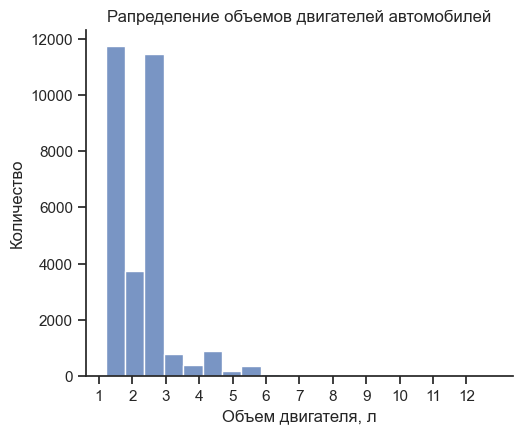

In [207]:
sns.histplot(df, x = 'engine_size', bins = 20)
plt.title('Рапределение объемов двигателей автомобилей')
plt.xlabel('Объем двигателя, л')
plt.ylabel('Количество')
plt.xticks(np.arange(1,13))
plt.show()

Большинство проданных автомобилей имеют объем двигателя до 3 литров.

In [209]:
print(f'Больше всего было продано автомобилей с двигателем с объемом {df['engine_size'].mode()[0]} л.')

Больше всего было продано автомобилей с двигателем с объемом 1.6 л.


Построим гистограммы для столбцов с ценой авто и стоимостью продажи.

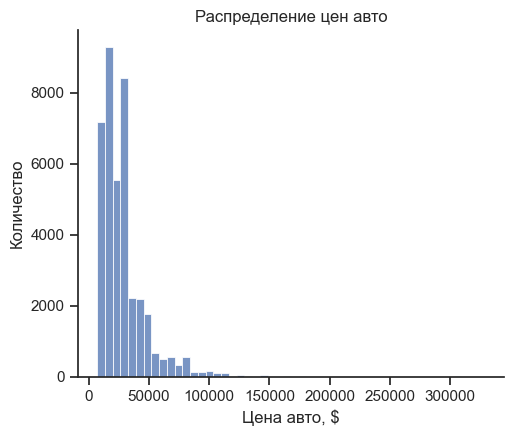

In [211]:
sns.histplot(df, x = 'car_price, USD', bins = 50)
plt.xlabel('Цена авто, $')
plt.ylabel('Количество')
plt.title('Распределение цен авто')
plt.show()

Большинство автомобилей стоили до 50 тыс. долларов, но цены доходили также до более чем 300 тыс. долларов. Рассмотрим аномальные значения.

In [213]:
# авто стоимостью более 200 тыс. долларов
df[df['car_price, USD'] > 200000][['model','car_price, USD','segment']].value_counts().reset_index()

,model,"car_price, USD",segment,count
0,ANKAI hff6124g03ev3,307986.3633,Коммерческие автомобили,10
1,Hyundai universe,239718.6584,Коммерческие автомобили,2
2,Hyundai universe,240826.5586,Коммерческие автомобили,2
3,Hyundai universe,207148.6245,Коммерческие автомобили,1
4,Hyundai universe,242854.5224,Коммерческие автомобили,1
5,Hyundai universe,243388.7358,Коммерческие автомобили,1
6,Land Rover range rover,209414.3988,Внедорожники,1
7,Land Rover range rover,218681.7443,Внедорожники,1
8,Mercedes-Benz setra,328510.9706,Коммерческие автомобили,1
9,Mercedes-Benz tourismo,303650.8783,Коммерческие автомобили,1


Представленные авто относятся к коммерческим (автобусам) или представлены внедорожником Range Rover. Исходя из изученной в интернете информации, данные авто могли достигать такой цены.

Рассмотрим распределение цен на авто по сегментам.

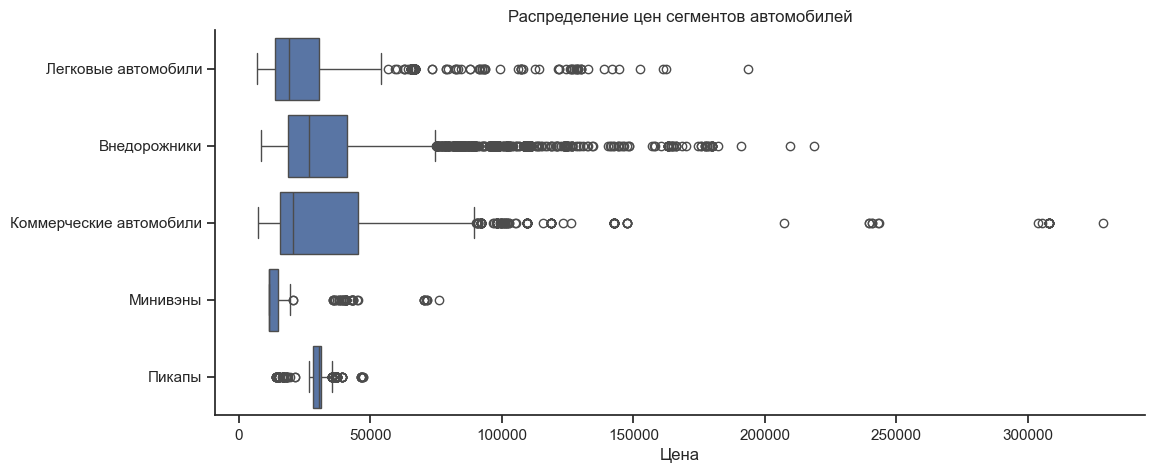

In [216]:
plt.figure(figsize = (12,5))
sns.boxplot(df, y = 'segment', x = 'car_price, USD')
plt.title('Распределение цен сегментов автомобилей')
plt.xlabel('Цена')
plt.ylabel('')
plt.show()

Самые высокие цены у коммерческих автомобилей.

Рассмотрим распределение стоимостей заказов.

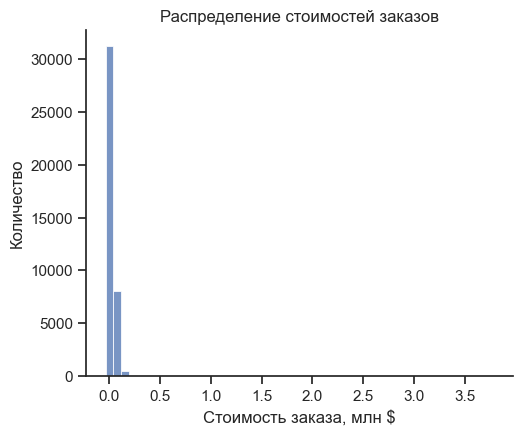

In [219]:
sns.histplot(df, x = 'order_price, mln USD', bins = 50)
plt.xlabel('Стоимость заказа, млн $')
plt.ylabel('Количество')
plt.title('Распределение стоимостей заказов')
plt.show()

Гистограмма из-за аномально высоких значений смещена влево.

Выведем заказ с минимальной стоимостью.

In [222]:
df['order_price, USD'].min()

-35588.25

Цена отрицательная, что является ошибкой. Сделаем срез с заказами, ценой менее 40 тыс. долларов.

In [224]:
# отсортируем по возрастанию цены заказа
df[df['order_price, USD']< 40000][['company','brand','model','car_price, USD','order_price, USD']]\
    .sort_values(by = 'order_price, USD').head()

,company,brand,model,"car_price, USD","order_price, USD"
25728,БИПЭК АВТО,Skoda,Skoda superb,35588.25,-35588.25
17350,БИПЭК АВТО,Lada,Lada granta,7100.00,7100.00
17274,БИПЭК АВТО,Lada,Lada granta,7100.00,7100.00
17273,БИПЭК АВТО,Lada,Lada granta,7100.00,7100.00
17272,БИПЭК АВТО,Lada,Lada granta,7100.00,7100.00


В датафрейме один заказ с отрицательной ценой. Следующая минимальная цена - 7100 $, что правдоподобно.

Удалим из датафрейма заказ с отрицательной стоимостью.

In [227]:
df = df[df['order_price, USD'] > 0]

Проанализируем заказы со сверхвысокой стоимостью (выше 1 млн. $).

In [229]:
df[df['order_price, USD']>1000000][['company','brand','model','amount','car_price, USD', 'order_price, USD','segment']]\
.sort_values(by = 'order_price, USD', ascending = False) # сортируем по убыванию цены

,company,brand,model,amount,"car_price, USD","order_price, USD",segment
39561,Daewoo Bus Kazakhstan,Daewoo,Daewoo bc 095,50,75564.12528,3778206.264,Коммерческие автомобили
39553,Daewoo Bus Kazakhstan,Daewoo,Daewoo bc 211 ma,30,105260.38790,3157811.637,Коммерческие автомобили
39560,Daewoo Bus Kazakhstan,Daewoo,Daewoo bc 095,30,75912.25590,2277367.677,Коммерческие автомобили
20218,СВС-ТРАНС,MAN,MAN tg,20,100216.63130,2004332.626,Коммерческие автомобили
25555,БИПЭК АВТО,Skoda,Skoda octavia,100,18700.00000,1870000.000,Легковые автомобили
20214,MAN Truck & Bus Kazakhstan,MAN,MAN tg,10,147701.63540,1477016.354,Коммерческие автомобили
20222,СВС-ТРАНС,MAN,MAN tg,14,100056.48350,1400790.769,Коммерческие автомобили
38408,Volkswagen Group Rus,Volkswagen,Volkswagen polo,79,15967.84791,1261459.985,Легковые автомобили
38710,Daewoo Bus Kazakhstan,Daewoo,Daewoo bs 106 d,16,74986.11074,1199777.772,Коммерческие автомобили
20349,Автокапитал,Mercedes-Benz,Mercedes-Benz g-class,7,165224.10220,1156568.715,Внедорожники


В данный срез входят заказы с высоким количеством авто. Оставим как есть.

Отметим, что половина заказов относится к коммерческим автомобилям.

Посмотрим распределение заказов стоимостью не выше 100000 $.

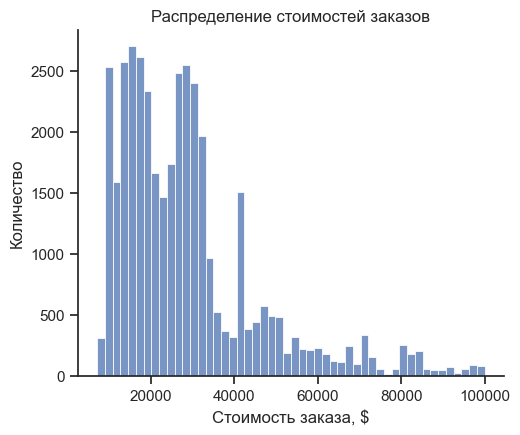

In [232]:
order_price_query = df[df['order_price, USD'] <= 100000]
sns.histplot(order_price_query, x = 'order_price, USD', bins = 50)
plt.xlabel('Стоимость заказа, $')
plt.ylabel('Количество')
plt.title('Распределение стоимостей заказов')
plt.show()

Основная часть заказов в пределах 40 тыс. $, что согласуется с ценами на авто.

Визуализируем распределение количества автомобилей в заказе.

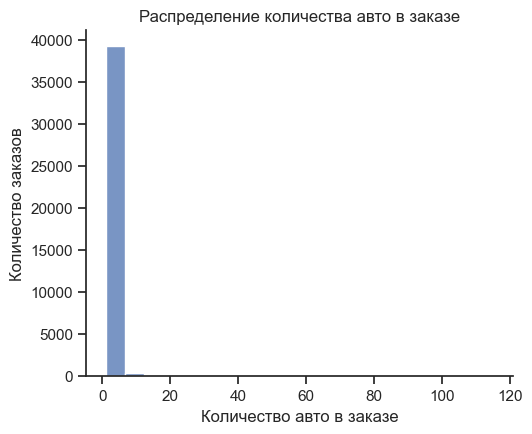

In [235]:
sns.histplot(df, x = 'amount', bins = 20)
plt.title('Распределение количества авто в заказе')
plt.xlabel('Количество авто в заказе')
plt.ylabel('Количество заказов')
plt.show()

График смещен влево из-за аномальных значений.

In [237]:
min_amount = df['amount'].min()
print(f'Минимальное количество авто в заказе: {min_amount}')

Минимальное количество авто в заказе: 1


Отрицательных значений нет.

Выведем гистограмму для заказов с менее чем 10 авто в заказе.

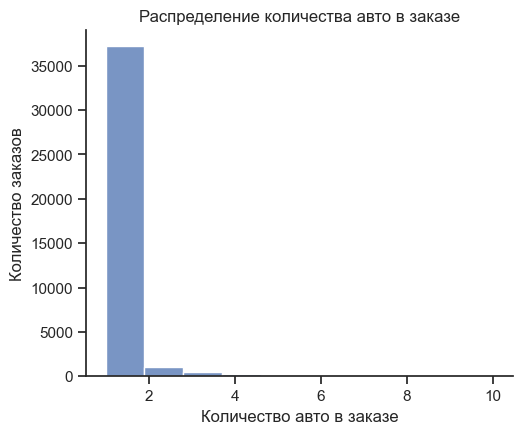

In [240]:
less_10_amount = df.query('amount <= 10')
sns.histplot (less_10_amount, x = 'amount', bins = 10)
plt.title('Распределение количества авто в заказе')
plt.xlabel('Количество авто в заказе')
plt.ylabel('Количество заказов')
plt.show()

В подавляющем большинстве случаев заказывали один автомобиль.

Построим гистограмму для для заказов с 2 и более автомобилями.

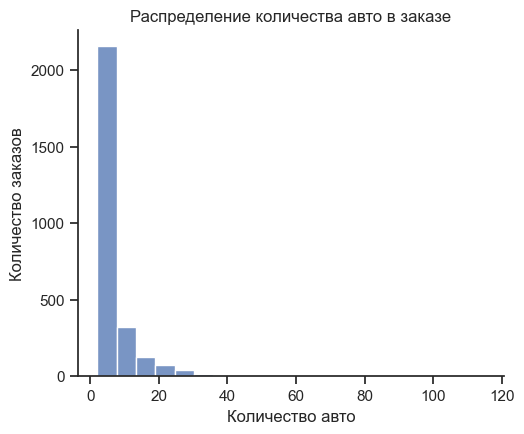

In [243]:
more_1_amount = df.query('amount > 1')
sns.histplot(more_1_amount, x = 'amount', bins = 20)
plt.title('Распределение количества авто в заказе')
plt.xlabel('Количество авто')
plt.ylabel('Количество заказов')
plt.show()

In [244]:
df['amount'].max()

115

Чем больше количество автомобилей в заказе, тем меньше заказов с таким количеством. При этом количество автомобилей в заказе доходит до 115.

### Анализ категориальных признаков

Определим 10 автоцентров с наибольшим количеством проданных авто.

*Здесь и в дальнейшем для подсчета количества автомобилей используется агрегация по сумме поля с количеством автомобилей в заказе, т.к. в одном заказе может быть более одного авто.*

In [249]:
top_10_companies = df.groupby('company')['amount'].sum().sort_values(ascending=False).head(10)

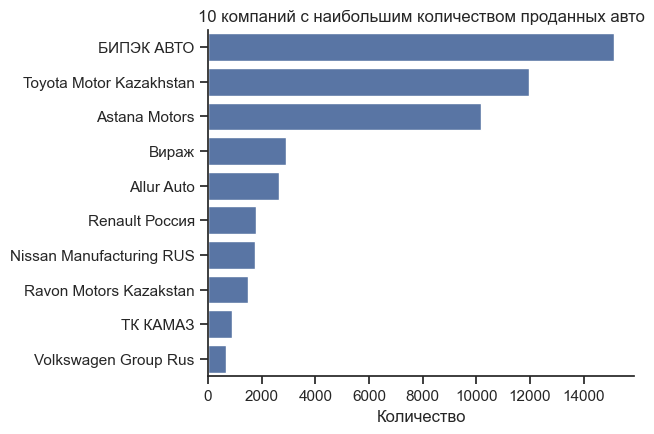

In [250]:
ax = sns.barplot(top_10_companies, orient = 'y')
plt.title ('10 компаний с наибольшим количеством проданных авто')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

С большим отрывом от остальных компаний лидирует тройка: БИПЭК АВТО, Toyota Motor Kazakhstan, Astana Motors. Каждая из этих компаний продала более 10 тыс. автомобилей в 2019 году.

Определим 10 автоцентров с самой большой выручкой в 2019 году.

In [253]:
top_10_companies_by_revenue = df.groupby('company')['order_price, mln USD'].sum().sort_values(ascending = False).head(10)

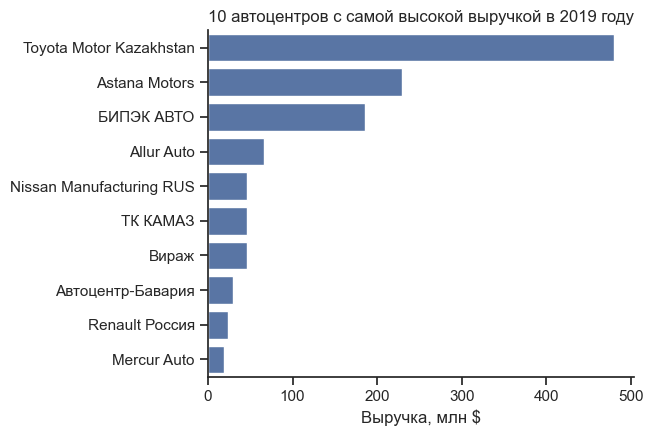

In [254]:
sns.barplot(top_10_companies_by_revenue, orient = 'y')
plt.xlabel('Выручка, млн $')
plt.ylabel('')
plt.title('10 автоцентров с самой высокой выручкой в 2019 году')
plt.show()

Самая большая выручка в 2019 у автоцентра Toyota Motor Kazakhstan: в два раза опережает второе место - Astana Motors. Лидер по количеству проданных авто — БИПЭК АВТО — на третьем месте по выручке.

Проанализируем бренды авто: визуализирем авто каких марок продавались в 2019 в Казахстане чаще всего.

In [257]:
top_10_brands = df.groupby('brand')['amount'].sum().sort_values(ascending = False).head(10)

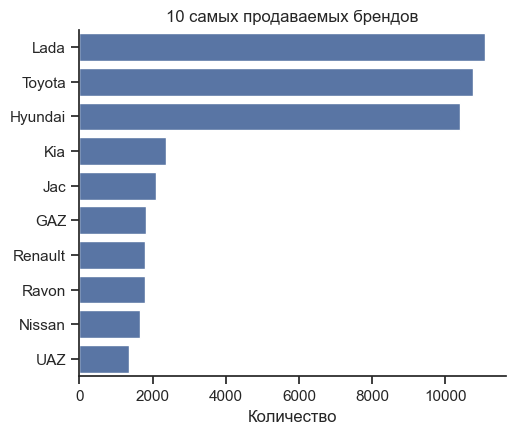

In [258]:
sns.barplot(top_10_brands, orient = 'y')
plt.title ('10 самых продаваемых брендов')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

Самые продаваемые автомобили — автомобили брендов Lada, Toyota, Hyundai. Они лидируют с большим отрывом от остальных марок.

Рассмотрим авто каких брендов принесли самую высокую выручку продавцам.

In [261]:
brands_revenue = df.groupby('brand')['order_price, mln USD'].sum().sort_values(ascending = False).head(10)

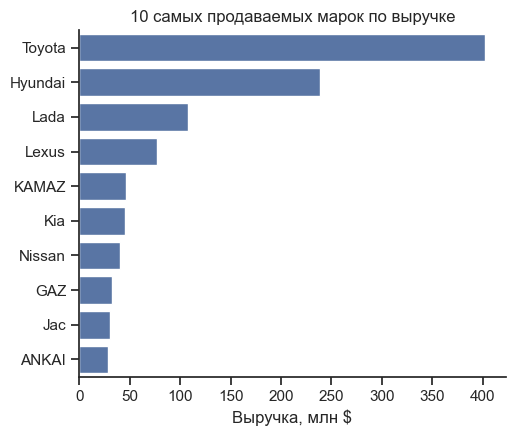

In [262]:
sns.barplot(brands_revenue, orient = 'y')
plt.xlabel('Выручка, млн $')
plt.ylabel('')
plt.title('10 самых продаваемых марок по выручке')
plt.show()

Больше всего денег казахским автоцентрам принесли автомобили марки Toyota, затем идет Hyundai, на третьем месте - лидер по количеству проданных авто, Lada. Другие марки, принесшие наибольшую выручку, на графике.

Узнаем какие модели авто были самыми продаваемыми в 2019 году.

In [265]:
top_10_models = df.groupby('model')['amount'].sum().sort_values(ascending = False).head(10)

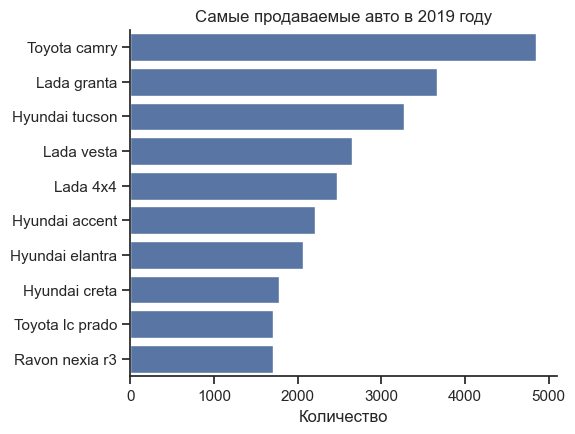

In [266]:
sns.barplot(top_10_models, orient = 'y')
plt.title('Самые продаваемые авто в 2019 году')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

Самой продаваемой машиной в Казахстане в 2019 году стала Toyota Camry (около 5 тыс. проданных экземпляров). За ней идет Lada Granta и Hyundai Tucson. Остальные авто, входящие в топ-10, представлены на экране.

Посмотрим какие модели авто принесли автоцентрам наибольшую прибыль.

In [269]:
most_valuable_cars = df.groupby('model')['order_price, mln USD'].sum().sort_values(ascending = False).head(10)

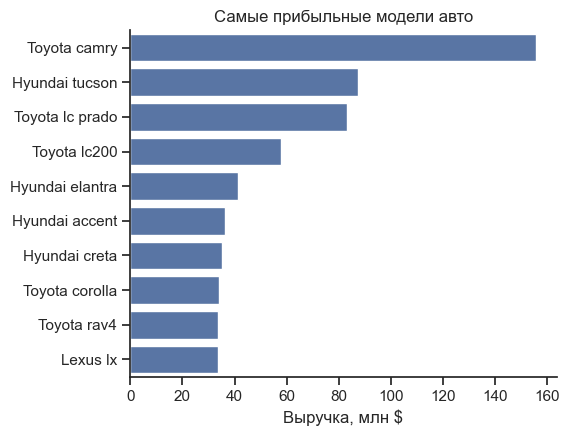

In [270]:
sns.barplot(most_valuable_cars, orient = 'y')
plt.title('Самые прибыльные модели авто')
plt.xlabel('Выручка, млн $')
plt.ylabel('')
plt.show()

Наибольшую выручку также принесла Toyota Camry, затем идут Hyundai Tucson и Toyota LC Prado. Автомобиль, занимающий 2-е место по количеству проданных авто — Lada Granta, в топ-10 автомобилей по выручке не входит.

Узнаем автомобили какого года производства были самыми продаваемыми в 2019 году. Визуализируем с помощью круговой диаграммы.

In [273]:
# для всех годов производства для которых было менее 1000 заказов установим категорию "другие"
year = df.groupby('model_year')['amount'].sum().reset_index()
year['model_year'] = year['model_year'].astype('str')
year.loc[(year['amount'] < 1000), 'model_year'] = 'другие'
year = year.groupby('model_year')['amount'].sum()

In [274]:
# функция для удаления подписей значений для сегментов с малой долей
def autopct_generator(threshold=1):
    def autopct(pct):
        return ('%1.1f%%' % pct) if pct >= threshold else ''
    return autopct

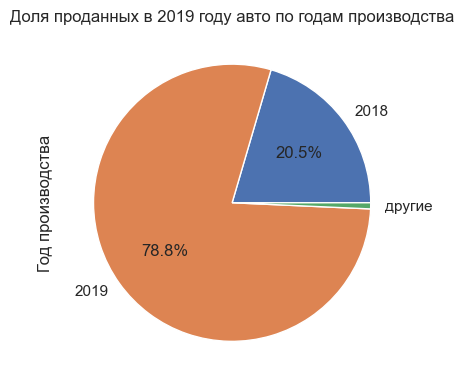

In [275]:
year.plot(kind = 'pie', autopct = autopct_generator())
plt.title('Доля проданных в 2019 году авто по годам производства')
plt.ylabel('Год производства')
plt.show()

Более 75% авто было произведено в год продажи (2019), 20% - в 2018 году, а менее 1% проданных в 2019 авто были произведены в остальные годы (2011, 2013-2017).

Посмотрим страны-производители с наибольшим количеством проданных авто в Казахстане.

In [278]:
top_10_countries = df.groupby('country')['amount'].sum().sort_values(ascending = False).head(10)

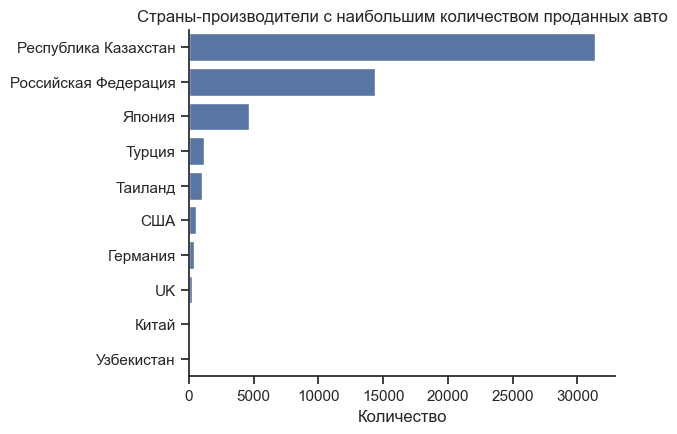

In [279]:
sns.barplot(top_10_countries, orient = 'y')
plt.title ('Страны-производители с наибольшим количеством проданных авто')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

Наибольшее количество авто произведено там же, где и продано - в Казахстане. За ним идут РФ и Япония. Количество произведенных авто в других странах по сравнению с первой тройкой незначительно.

Проанализируем долю проданных авто в разрезе топлива.

In [282]:
fuel = df.groupby('fuel')['amount'].sum().sort_values(ascending = False)

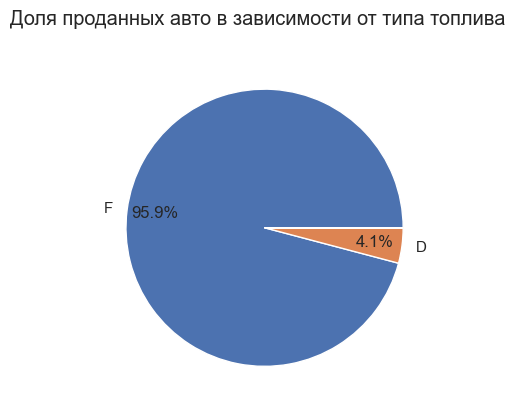

In [283]:
labels = ['F','D','',''] # убираем подписи к гибридным и электродвигателям, т.к. их доля минимальна
fuel.plot(kind = 'pie', autopct = autopct_generator(), title = 'Доля проданных авто в зависимости от типа топлива',\
          pctdistance = 0.8, subplots = True, labels = labels)
plt.ylabel('')
plt.show()

В проданных авто преобладают бензиновые двигатели, также есть часть авто, использующих дизельное топливо. Количество автомобилей с электро- и гибридным двигателем очень мало.

Посмотрим на количество проданных автомобилей в разрезе коробки передач.

In [286]:
tm = df.groupby('transmission')['amount'].sum().sort_values(ascending = False).head()

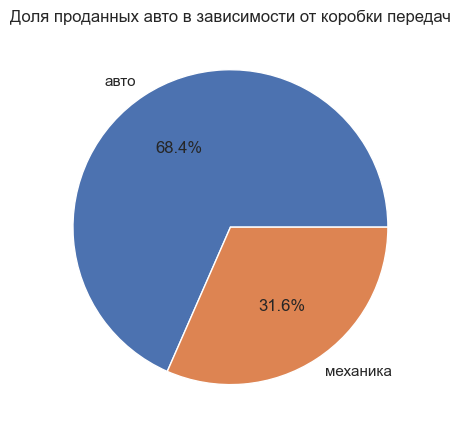

In [287]:
tm.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.title ('Доля проданных авто в зависимости от коробки передач')
plt.tight_layout()
plt.show()

Большинство водителей предпочитают автоматическую коробку передач, однако водителей, предпочитающих механику, тоже немало.

Рассмотрим долю типов привода среди проданных автомобилей.

In [290]:
drive_type = df.groupby('drive_type')['amount'].sum().sort_values(ascending = False)

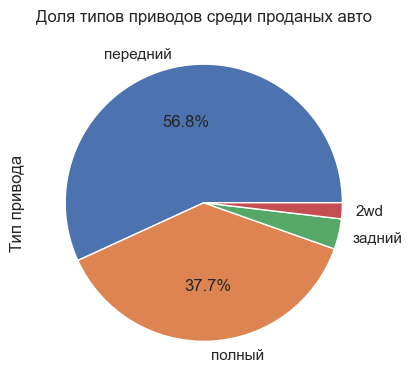

In [291]:
drive_type.plot(kind = 'pie', autopct = autopct_generator(5))
plt.title('Доля типов приводов среди проданых авто')
plt.ylabel('Тип привода')
plt.show()

In [292]:
# доля авто с неполным неопределенным типом привода
print(round(len(df[df['drive_type'] == '2wd'])/len(df) * 100,1),'%')

1.9 %


Самые популярные типы привода на рынке в Казахстане в 2019 году — передний (56,8% - 58,7%) и полный (37,7%).

Рассмотрим в какие города Казахстана было продано наибольшее количество автомобилей.

In [295]:
cities = df.query('city != "ЭКСПОРТ"').groupby('city')['amount'].sum().sort_values(ascending = False).head(10)

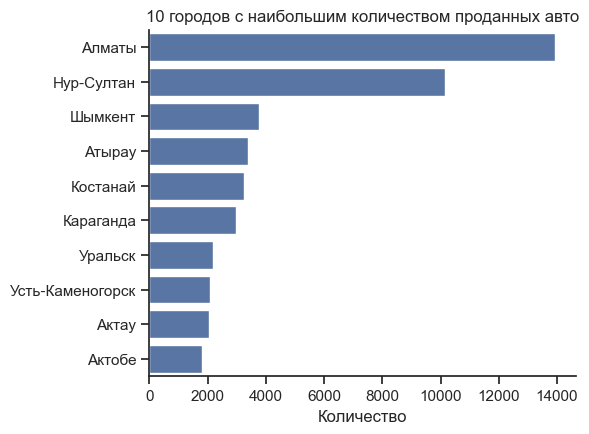

In [296]:
sns.barplot(cities, orient = 'y')
plt.title('10 городов с наибольшим количеством проданных авто')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

По количеству проданных авто на первом месте — самый крупный по населению город Казахстана, Алматы; на втором месте — столица страны, Астана (Нур-Султан). Другие города республики с высоким количеством проданных авто представлены на диаграмме.

Визуализируем в каких регионах Казахстана наибольшее количество проданных автомобилей.

In [299]:
regions = df.groupby('region')['amount'].sum().sort_values(ascending = False).head(10)

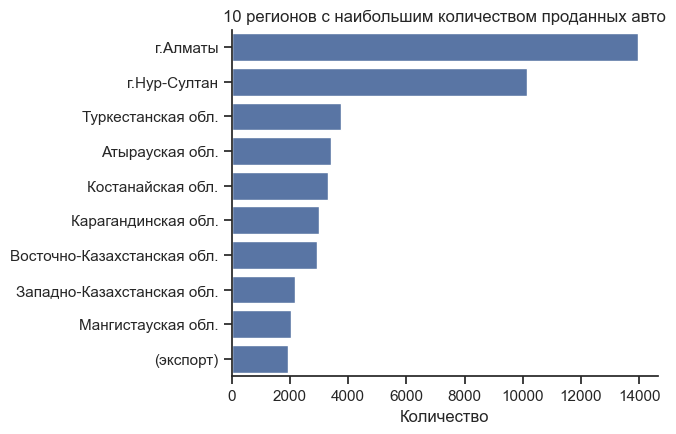

In [300]:
sns.barplot(regions, orient = 'y')
plt.title('10 регионов с наибольшим количеством проданных авто')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

В целом, картина та же, что и с городами. Оставим в датафрейме только столбец с регионами.

In [302]:
df = df.drop('city', axis = 1)

Проанализируем даты продаж. Рассмотрим количество проданных автомобилей в каждом месяце и их выручку.

In [304]:
month_quantity = df.groupby('date')['amount'].sum()
month_revenue = df.groupby('date')['order_price, mln USD'].sum()

In [305]:
def two_axes_linear(qnt_data, rev_data, title):
    sns.set_theme(style = 'ticks', palette = 'deep')
    fig, ax1 = plt.subplots(figsize = (8,4.5))
    ax1 = qnt_data.plot(label = 'Количество проданных авто', legend = False)
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax1.xaxis.set_major_formatter(formatter)
    ax1.set_xlabel('Месяц')
    ax1.set_ylabel('Количество')
    ax2 = ax1.twinx()
    ax2 = rev_data.plot(color = 'orange', label = 'Выручка', legend = False)
    ax2.set_ylabel('Выручка, млн $')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.title(title)
    plt.show()
    sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False, "axes.spines.top": False})

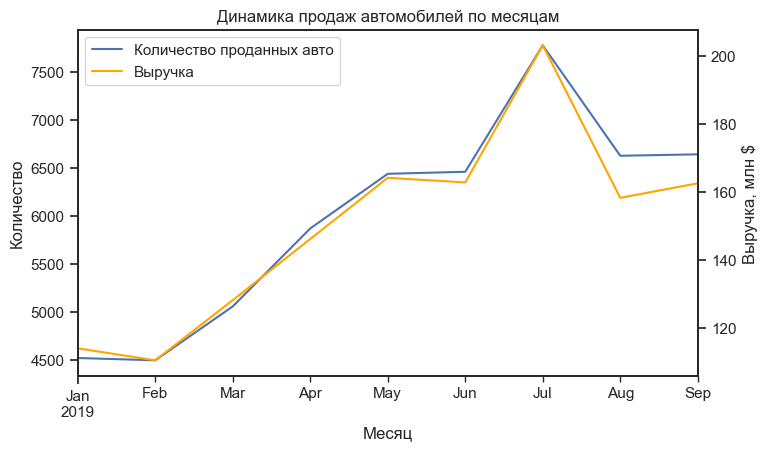

In [306]:
two_axes_linear(month_quantity, month_revenue, 'Динамика продаж автомобилей по месяцам')

Количество проданных авто и выручка с них по месяцам имеют схожую картину.

В начале года наблюдался самый низкий уровень продаж. С февраля по май - подъем продаж, в июне уровень примерно такой же, как в мае. В июле наблюдается пик продаж. В августе продажи падают (чуть выше июльских значений по количеству, но чуть ниже по выручке), в сентябре уровень продаж примерно такой же, как в августе.

Проанализируем поле с сегментами автомобилей.

In [309]:
segments = df.groupby('segment')['amount'].sum()

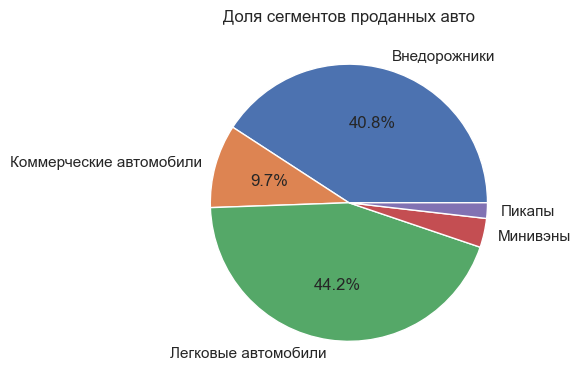

In [310]:
segments.plot(kind = 'pie', autopct = autopct_generator(5))
plt.title('Доля сегментов проданных авто')
plt.ylabel('')
plt.show()

Автолюбители Казахстана в 2019 предпочли в первую очередь легковые авто и внедорожники. Чуть менее 10% занимает доля коммерческих авто. Наименее продаваемы были пикапы и минивэны: на двоих у них около 5%.

### Вывод по разделу

В ходе исследовательского анализа данных было проанализировано распределение цен автомобилей, сумм заказов, количества автомобилей в заказе, объемов двигателей. Данные смещены влево из-за наличия сверхвысоких значений. Сами значения было решено оставить.

Выяснили какие автоцентры имели самые высокие продажи, самые продаваемые автомобили на рынке, как распределены продажи по годам производства, странам производителям, типу топлива, коробкам передач, типам приводов, городам, регионам и сегментам. Выявлена динамика продаж по месяцам.

## Анализ рынка

Учитывая специфичность некоммерческого сегмента автомобилей (высокая цена автомобилей и высокое количество авто в одном заказе), данный сегмент заслуживает отдельного рассмотрения.

In [316]:
non_commercial = df.query('segment != "Коммерческие автомобили"') # выборка некоммерческих авто
commercial = df.query('segment == "Коммерческие автомобили"') # выборка коммерческих авто

In [317]:
# количество записей и сегменты среза с некоммерческими авто
print(len(non_commercial)) 
non_commercial['segment'].unique()

35631


array(['Легковые автомобили', 'Внедорожники', 'Минивэны', 'Пикапы'],
      dtype=object)

In [318]:
# количество записей и сегменты среза с коммерческими авто
print(len(commercial))
commercial['segment'].unique()

4328


array(['Коммерческие автомобили'], dtype=object)

Данные успешно разделены.

### Общие показатели

Определим объем рынка в Казахстане в 2019 году: сколько автомобилей было продано и сколько денег было потрачено потребителями на авто.

In [322]:
print(f'В 2019 году в Республике Казахстан было продано {df['amount'].sum()} автомобилей.')

В 2019 году в Республике Казахстан было продано 53875 автомобилей.


In [323]:
rev_volume = round(df['order_price, USD'].sum())
print(f'Сумма потраченная потребителями на авто в 2019 году в РК составила {rev_volume} $')
print (f'Из них доля коммерческих авто составила {round(commercial['order_price, USD'].sum()/rev_volume*100,2)}%')

Сумма потраченная потребителями на авто в 2019 году в РК составила 1349194556 $
Из них доля коммерческих авто составила 13.77%


Более 1,3 миллиарда долларов составил объем рынка.

In [325]:
avg_bill = round(df['order_price, USD'].mean())
com_bill = round(commercial['order_price, USD'].mean())
non_com_bill = round(non_commercial['order_price, USD'].mean())
print(f'Средний чек на рынке составил {round(avg_bill)} $.')

Средний чек на рынке составил 33764 $.


Сравним данный показатель для коммерческого и некоммерческих сегментов. Для наглядности продемонстрируем на графике.

In [327]:
x = ['Коммерческие', 'Некоммерческие']
def comparison (com_y,non_com_y,line,linelabel,text_loc = None):
    y = com_y, non_com_y
    ax = plt.bar(x,y)
    plt.axhline(line, linestyle = '--', color = 'red', label = linelabel)
    plt.bar_label(ax, label_type = 'center', color = 'white')
    if text_loc == 'left':
        plt.text(-0.3,line * 1.01,f'{line}', color = 'red')
    else:
        plt.text(1.2,line * 1.01,f'{line}', color = 'red')
    plt.legend()
    plt.tight_layout()

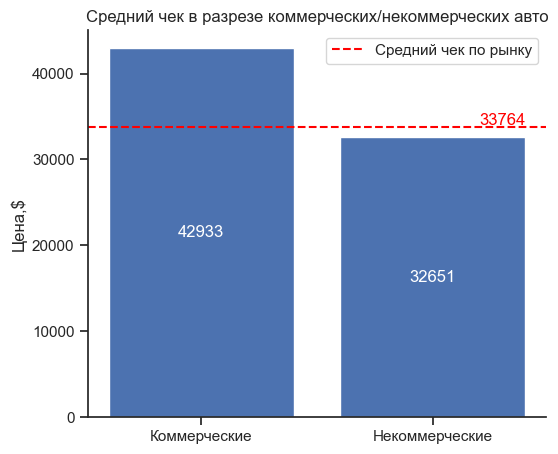

In [328]:
comparison(com_bill,non_com_bill,avg_bill,'Средний чек по рынку')
plt.title('Средний чек в разрезе коммерческих/некоммерческих авто')
plt.ylabel('Цена,$')
plt.show()

Средний чек коммерческих авто отличается от такового у некоммерческих.

In [330]:
avg_car_price = round(df['car_price, USD'].mean())
print(f'Средняя цена на авто по рынку составляет {avg_car_price} $.')

Средняя цена на авто по рынку составляет 28252 $.


Посмотрим в разрезе некоммерческих/коммерческих авто.

In [332]:
non_com_car_price = round(non_commercial['car_price, USD'].mean())
com_car_price = round(commercial['car_price, USD'].mean())

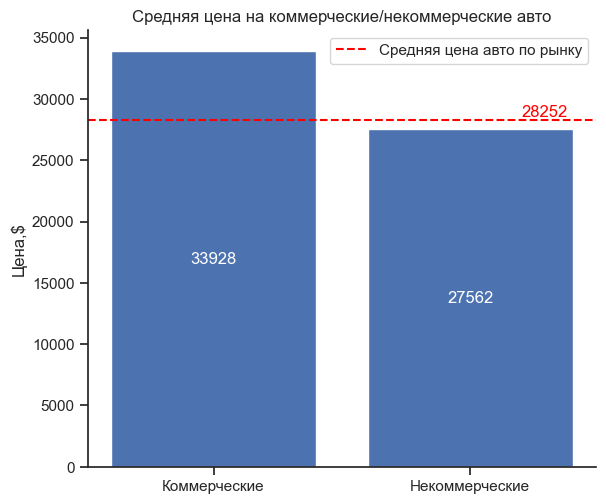

In [333]:
plt.figure(figsize = (6,5))
comparison(com_car_price, non_com_car_price, avg_car_price, 'Средняя цена авто по рынку')
plt.title('Средняя цена на коммерческие/некоммерческие авто')
plt.ylabel('Цена,$')
plt.show()

Средняя цена на коммерческие авто выше, чем на остальные.

In [335]:
cnt_of_cars_by_companies = df.groupby('company')['amount'].sum().reset_index()
mean_amount = round(cnt_of_cars_by_companies['amount'].mean())
print(f'Среднее количество проданных авто на автоцентр составляет {mean_amount} автомобиля.')

Среднее количество проданных авто на автоцентр составляет 1633 автомобиля.


In [336]:
cnt_of_com_cars_by_companies = commercial.groupby('company')['amount'].sum().reset_index()
com_mean_amount = round(cnt_of_com_cars_by_companies['amount'].mean())
cnt_of_non_com_cars_by_companies = non_commercial.groupby('company')['amount'].sum().reset_index()
non_com_mean_amount = round(cnt_of_non_com_cars_by_companies['amount'].mean())

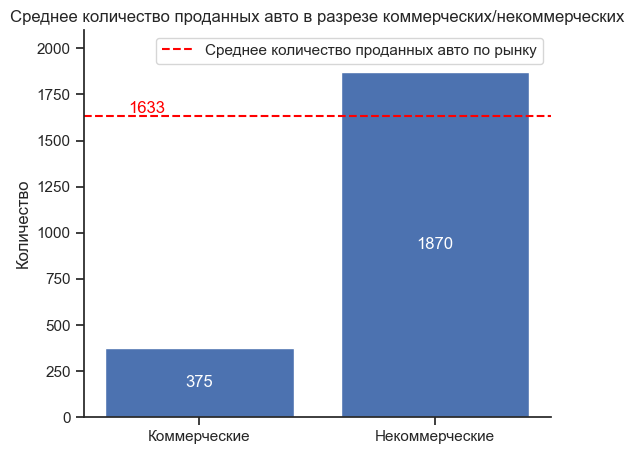

In [337]:
comparison(com_mean_amount,non_com_mean_amount,mean_amount, 'Среднее количество проданных авто по рынку',\
    text_loc = 'left')
plt.ylim(0,2100)
plt.ylabel('Количество')
plt.title('Среднее количество проданных авто в разрезе коммерческих/некоммерческих')
plt.show()

По данному показателю с отрывом лидирует некоммерческий сегмент.

In [339]:
revenue_by_companies = df.groupby(['company'])['order_price, mln USD'].sum().reset_index()
mean_revenue = round(revenue_by_companies['order_price, mln USD'].mean())
print(f'Средняя выручка на автоцентр составила {mean_revenue} млн $')

Средняя выручка на автоцентр составила 41 млн $


In [340]:
mean_revenue = round(revenue_by_companies['order_price, mln USD'].mean(),2)
revenue_by_companies_non_com = non_commercial.groupby(['company'])['order_price, mln USD'].sum().reset_index()
mean_rev_non_com = round(revenue_by_companies_non_com['order_price, mln USD'].mean(),2)
revenue_by_companies_com = commercial.groupby(['company'])['order_price, mln USD'].sum().reset_index()
mean_rev_com = round(revenue_by_companies_com['order_price, mln USD'].mean(),2)

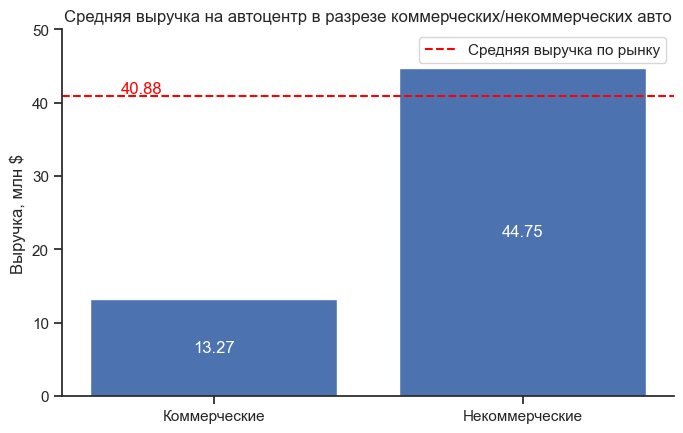

In [341]:
plt.figure(figsize = (7,4.5))
comparison(mean_rev_com, mean_rev_non_com,mean_revenue, 'Средняя выручка по рынку', text_loc = 'left')
plt.ylabel('Выручка, млн $')
plt.title('Средняя выручка на автоцентр в разрезе коммерческих/некоммерческих авто')
plt.ylim(0,50)
plt.tight_layout()
plt.show()

В данном случае показатель коммерческих авто уступает некоммерческим. Автоцентры в среднем от коммерческих авто получали 13,3 млн долларов, а от некоммерческих - 44,8 млн.

Посмотрим есть ли корреляция между выручкой компании и другими признаками.

Построим сводную таблицу с годовой выручкой, средним чеком, средней ценой авто, количеством проданных автомобилей и средним количеством авто на заказ для каждого автоцентра.

In [345]:
def pivot (data):
    table = data.groupby('company').agg({'order_price, mln USD': ['sum','mean'], 'car_price, USD': 'mean','amount':\
        ['sum','mean']})
    table.columns = ['revenue', 'avg_bill', 'avg_car_price', 'cars_number','avg_amount'] # переименуем поля
    table = table.reset_index()
    return table

In [346]:
common_agg = pivot(df)
non_commercial_agg = pivot(non_commercial)
commercial_agg = pivot(commercial)
metrics_agg = [common_agg, non_commercial_agg, commercial_agg]

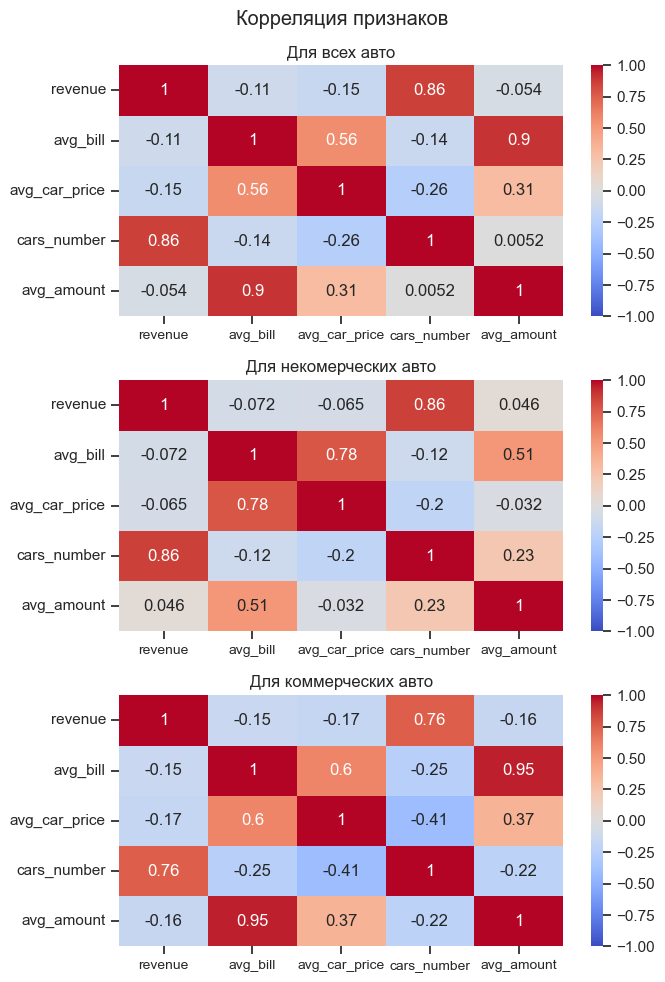

In [347]:
fig, axs = plt.subplots (3,1, figsize = (7,10))
axs = axs.flatten()
for i,t in enumerate(metrics_agg):
    corr = t.drop('company', axis = 1).corr()
    sns.heatmap(corr, annot = True, cmap = 'coolwarm', ax = axs[i], vmin = -1)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation='horizontal', fontsize = 10)
    axs[0].set_title('Для всех авто')
    axs[1].set_title('Для некомерческих авто')
    axs[2].set_title('Для коммерческих авто')
fig.suptitle('Корреляция признаков')
plt.tight_layout()

В целом высокая корреляция между выручкой и количеством проданных авто (для коммерческих выражена чуть слабее). 

Средний чек коррелирует со средним количеством проданных авто в заказе (особенно тесно в рынке коммерческих авто). Также есть корреляция между средним чеком и средней ценой продаваемых авто (для некоммерческих авто более выражена). 

Есть обратная корреляция между средней ценой авто в автоцентре и количеством проданных автомобилей (для некоммерческих авто корреляция имеет слабый характер, но для коммерческих - умеренный). 

Также для коммерческих автомобилей наблюдается умеренная корреляция между средним количеством авто в заказе и средней ценой автомобилей.

Таким образом можно сделать вывод, что автоцентры с высокой выручкой продают большое количество автомобилей.

На средний чек влияет количество автомобилей в заказе и их цена. При этом средний чек на выручку не имеет влияния.

Визуализируем корреляцию между прибылью автоцентров и количеством проданных в них автомобилей.

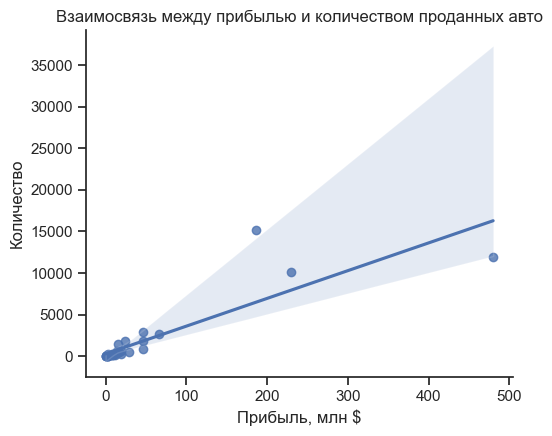

In [351]:
sns.regplot(common_agg, x = 'revenue', y = 'cars_number')
plt.xlabel('Прибыль, млн $')
plt.ylabel('Количество')
plt.title('Взаимосвязь между прибылью и количеством проданных авто')
plt.show()

### Анализ некоммерческого сегмента

Определим автоцентры лидеры по продажам в некоммерческом сегменте.

In [354]:
# топ 10 по выручке
top_10_nc_comps_by_rev = non_commercial.groupby('company')['order_price, mln USD'].sum().reset_index()
top_10_nc_comps_by_rev = top_10_nc_comps_by_rev.sort_values(by = 'order_price, mln USD', ascending = False).head(10)
# топ 10 по количеству
top_10_nc_comps_by_qty = non_commercial.groupby('company')['amount'].sum().reset_index()
top_10_nc_comps_by_qty = top_10_nc_comps_by_qty.sort_values(by = 'amount', ascending = False).head(10)

In [355]:
def top_10_plot (quantity_data, rev_data, title):
    sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False, "axes.spines.top": False})
    fig = plt.figure(figsize = (14,5))
    # первый график
    plt.subplot(1,2,1)
    sns.barplot(quantity_data, y = 'company', x = 'amount')
    plt.ylabel('')
    plt.xlabel('Количество')

    plt.title('По количеству проданных авто')
    # второй график
    plt.subplot(1,2,2)
    sns.barplot(rev_data, y = 'company', x = 'order_price, mln USD')
    plt.ylabel('')
    plt.xlabel('Выручка, млн $')
    plt.title('По выручке')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

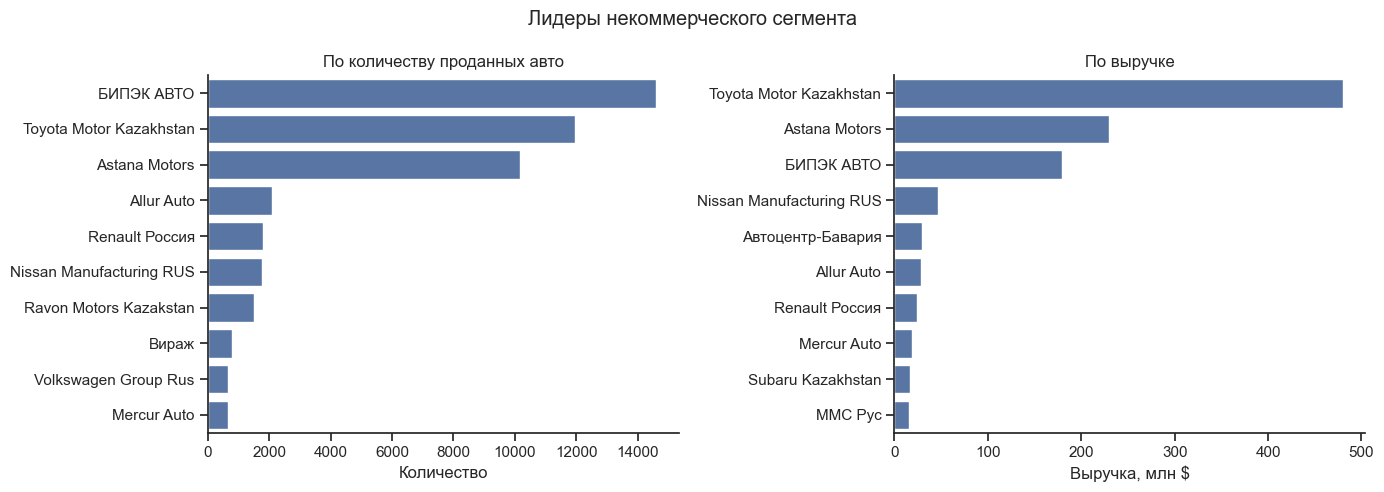

In [356]:
top_10_plot(top_10_nc_comps_by_qty, top_10_nc_comps_by_rev, 'Лидеры некоммерческого сегмента')

В целом картина та же, что и в целом по рынку. 3 лидера без изменений.

Посмотрим авто каких классов продают в 3 самых успешных по выручке автоцентрах.

In [359]:
top_3_nc_companies = top_10_nc_comps_by_rev.head(3).reset_index()['company'].to_list()
top_3_nc_companies = non_commercial.query('company in @top_3_nc_companies')
top_3_nc_companies_segments = top_3_nc_companies.groupby('segment')['amount'].sum()

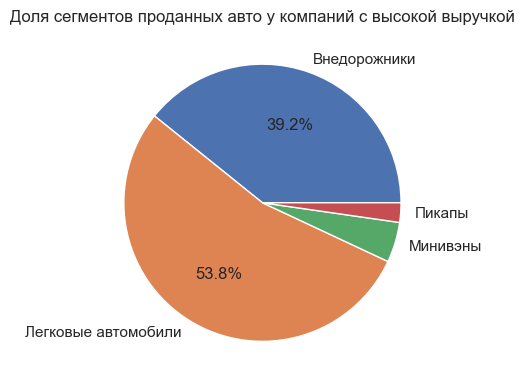

In [360]:
top_3_nc_companies_segments.plot(kind = 'pie', autopct = autopct_generator(5))
plt.ylabel('')
plt.title('Доля сегментов проданных авто у компаний с высокой выручкой')
plt.show()

Самые успешные автоцентры специализируются на продажах легковых автомобилей и внедорожников. 7 % продаж составляют пикапы и минивэны.

Визуализируем динамику продаж для некоммерческого сегмента.

In [363]:
month_qty = non_commercial.groupby('date')['amount'].sum()
month_rev = non_commercial.groupby('date')['order_price, mln USD'].sum()

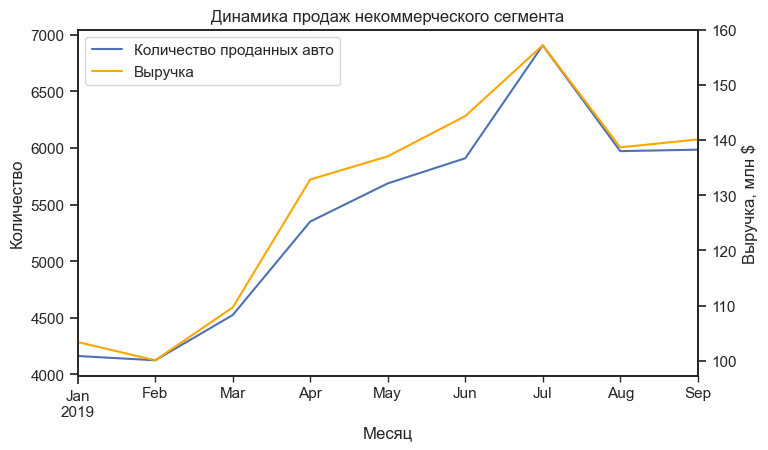

In [364]:
two_axes_linear(month_qty, month_rev, title = 'Динамика продаж некоммерческого сегмента')

В целом картина та же, что и в общем по рынку: в течение года продажи поднимаются, резкий пик в июле и снижение в августе-сентябре.

Проанализируем некоммерческие авто какой ценовой категории лучше продаются и приносят наибольшую выручку.

Сперва нужно провести категоризацию цен.

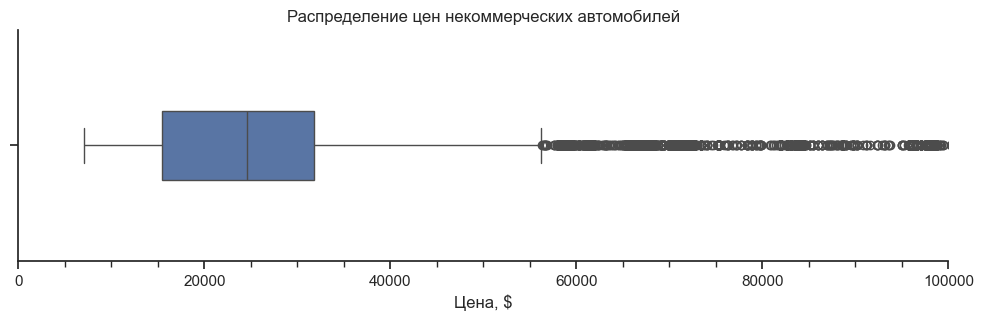

In [368]:
plt.figure(figsize = (12,3))
sns.boxplot(non_commercial, x = 'car_price, USD', width = 0.3)
plt.minorticks_on()
plt.xlabel('Цена, $')
plt.ylabel('')
plt.title('Распределение цен некоммерческих автомобилей')
plt.xlim(0,100000)
plt.show()

Исходя из данного графика, определим авто с ценой менее 15 000 долларов как бюджетные, от 15 000  до 35 000 долларов - как средний ценовой сегмент, от 35 до 55 тыс. как премиальный ценовой сегмент, от 55 000 $ - как люксовый.

In [370]:
def categorize_price(row):
    if row < 15000:
        return 'бюджетный'
    elif row >= 15000 and row < 35000:
        return 'средний'
    elif row >= 35000 and row < 55000:
        return 'премиум'
    elif row >= 55000:
        return 'люкс'

In [371]:
non_commercial.loc[:,'price_category'] = non_commercial.loc[:,'car_price, USD'].apply(categorize_price)

Построим диаграмму на которой будет отображено количество проданных авто и выручка с каждой ценовой категории.

In [373]:
sales = non_commercial.groupby('price_category').agg({'amount':'sum', 'order_price, mln USD':'sum'})
sales = sales.sort_values(by = 'amount', ascending = False)

In [374]:
# создадим функцию для отрисовки диаграмм с двумя осями Y на одном графике 
# (по сути - 2 столбчатые диаграммы в одном окне)
def two_axes_plot(data, figsize):
    sns.set_theme(style = 'ticks', palette = 'deep')
    categories = data.index.to_list() # список категорий
    y1 = data['amount'].to_list() # значения для первой оси y
    y2 = data['order_price, mln USD'].to_list() # значения для второй оси Y
    x = range(len(categories)) # каждой категории присваивается номер
    x1 = [i - 0.2 for i in x] # смещаем столбцы, чтобы не накладывались друг на друга
    x2 = [i + 0.2 for i in x]
    # первая диаграмма
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.bar(x1, y1, width = 0.3, label = 'Количество проданных авто')
    ax1.set_ylabel('Количество')
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories)
    ax1.set_xlabel('Ценовой сегмент')
    ax2 = ax1.twinx() # задаем общую ось X
    # вторая диаграма
    ax2.bar(x2, y2, width = 0.3, color = 'c', label = 'Выручка')
    ax2.set_ylabel ('Выручка, млн $')
    lines1, labels1 = ax1.get_legend_handles_labels() #легенды
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.tight_layout()

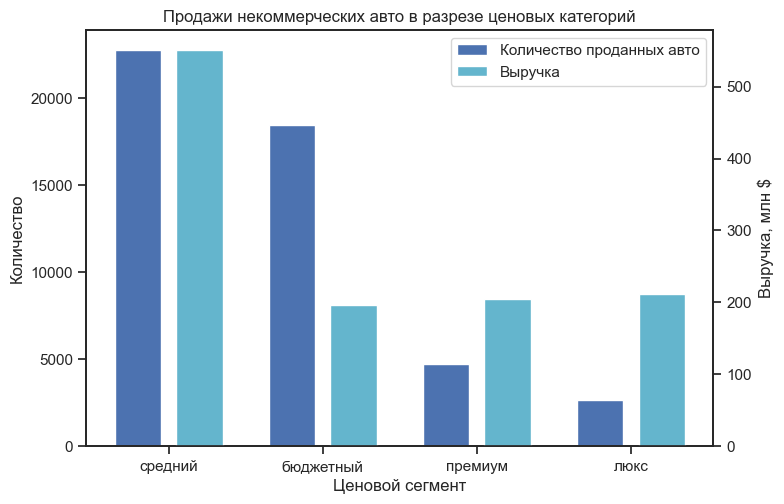

In [375]:
sns.set_theme(style = 'ticks', palette = 'deep')
two_axes_plot(sales,(8,5))
plt.title('Продажи некоммерческих авто в разрезе ценовых категорий')
plt.show()
sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False, "axes.spines.top": False})

Наибольшее количество проданных авто и наибольшая выручка у автомобилей средней ценовой категории. Бюджетные автомобили, несмотря на большее количество проданных экземпляров, принесли прибыли не больше, чем автомобили люксового и премиум класса.

Проанализируем распределение выручки по ценовым сегментам у 10 автоцентров с самой большой выручкой.

In [378]:
def company_n_segment(top_comps_rev, data,title):
    # срез продаж некоммерческих авто у 10 автоцетров с наибольшей выручкой
    top_comps_rev = top_comps_rev.reset_index().head(10)
    companies_list = top_comps_rev['company'].to_list()
    top_companies_query = data.query('company in @companies_list')
    # сводная таблица с выручкой по сегменту каждого автоцентра из 10 самых успешных
    revenue_segm = top_companies_query.groupby(['company','price_category'])['order_price, mln USD'].sum().reset_index()
    # cоединяем с топ-10 без разреза по сегментам для сортировки
    revenue_segm = revenue_segm.merge(top_comps_rev, on = 'company')
    revenue_segm = revenue_segm.sort_values(by = 'order_price, mln USD_y', ascending = True)
    revenue_segm = revenue_segm.drop('order_price, mln USD_y', axis = 1)
    # строим график 
    sns.set_style('whitegrid')
    plt.figure(figsize = (7,8))
    sns.scatterplot(revenue_segm, x = 'price_category', y = 'company', size = 'order_price, mln USD_x',\
        sizes = (10,1500), legend = False)
    plt.xlabel('Ценовой сегмент')
    plt.ylabel('')
    plt.xlim(-1,4)
    plt.ylim(-1,10)
    plt.title(title)
    plt.show()
    sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False, "axes.spines.top": False})

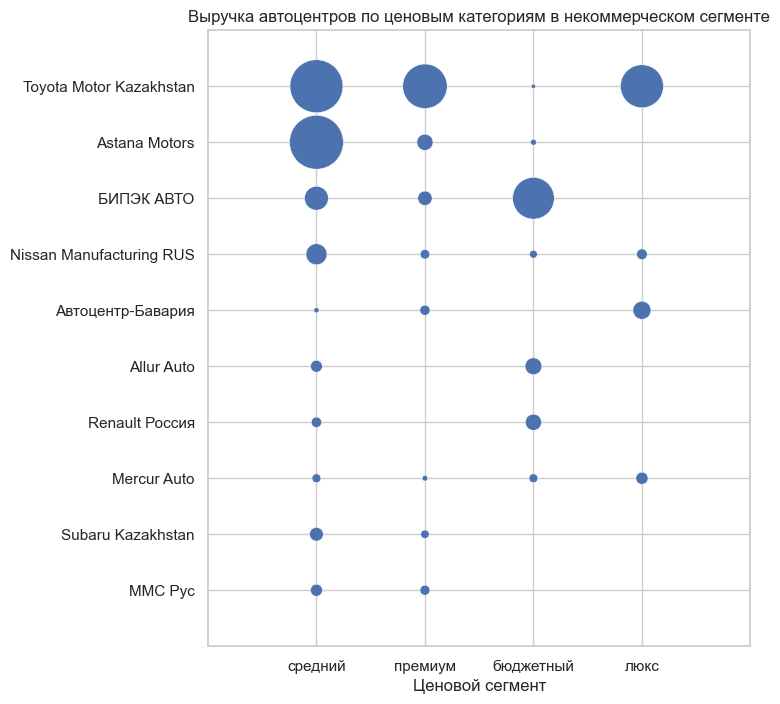

In [379]:
company_n_segment(top_10_nc_comps_by_rev, non_commercial,\
    'Выручка автоцентров по ценовым категориям в некоммерческом сегменте')

У 2 самых успешных автоцентров в 2019 году практически отсутствует вклад бюджетных авто в показатели выручки. Автоцентр БИПЭК авто, несмотря на свое лидерство по количеству проданных автомобилей, в показателях выручки на третьем месте, т.к. специализируется на продаже бюджетных автомобилей.

Таким образом, на успешность на некоммерческом рынке для автоцентра влияют такие показатели как количество проданных авто, так и их ценовая категория.

Посмотрим в каких регионах были самые высокие продажи некоммерческих авто.

In [382]:
def top_regions(data,title):
    columns = ['amount','order_price, mln USD']
    fig, axs = plt.subplots(1,2, figsize = (14,5))
    for i,c in enumerate(columns):
        table = data.groupby('region')[c].sum().reset_index()
        table = table.sort_values(by = c, ascending = False).head(10)
        sns.barplot(table, y = 'region', x = c, ax = axs[i])
        axs[i].set_ylabel('')
        axs[0].set_xlabel('Количество')
        axs[1].set_xlabel('Выручка, млн $')
        axs[0].set_title('По количеству')
        axs[1].set_title('По выручке')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

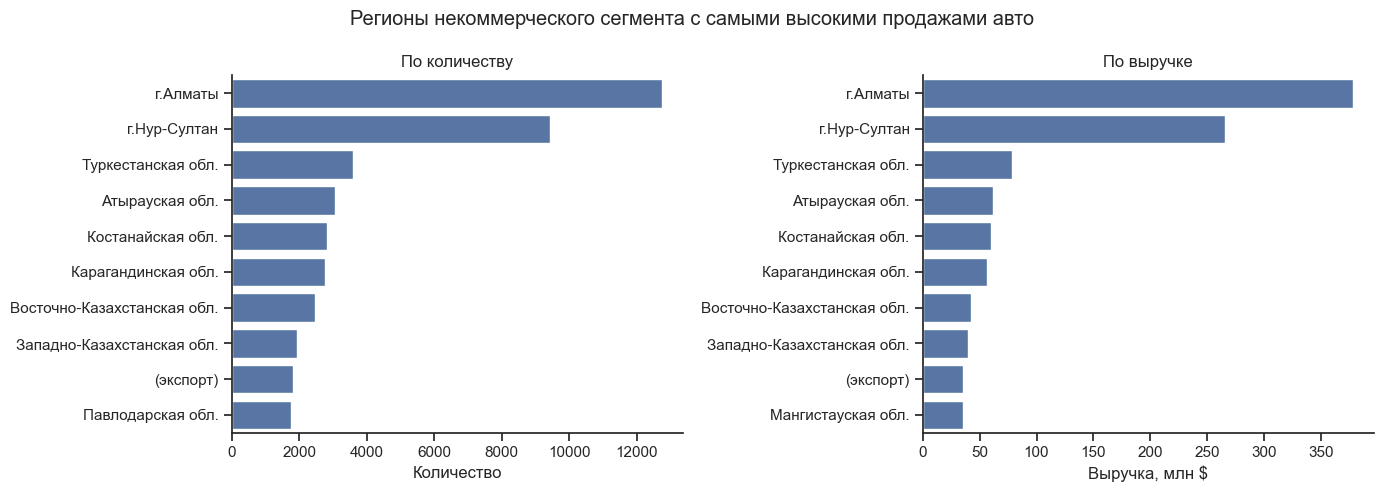

In [383]:
sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False, "axes.spines.top": False})
top_regions(non_commercial, 'Регионы некоммерческого сегмента с самыми высокими продажами авто')

По количеству проданных машин и по выручке картина практически одинаковая: лидируют Алматы и Нур-Султан, следующие 7 городов также повторяются.

Посмотрим как распределены регионы продаж в успешных некоммерческих автоцентрах.

In [386]:
def company_n_regions(top_comps_rev, data, title):
    sns.set_style('whitegrid')
    top_comps_rev = top_comps_rev.reset_index().head(10)
    companies_list = top_comps_rev['company'].to_list()
    top_companies_query = data.query('company in @companies_list')
    # сводная таблица с количеством проданных авто по региону каждого автоцентра из 10 самых успешных
    amount_region = top_companies_query.groupby(['company','region'])['amount'].sum().reset_index()
    # cоединяем с топ-10 без разреза по сегментам для сортировки
    amount_region = amount_region.merge(top_comps_rev, on = 'company')
    amount_region = amount_region.sort_values(by = 'order_price, mln USD', ascending = False)
    amount_region = amount_region.drop('order_price, mln USD', axis = 1)
    # строим график
    plt.figure(figsize = (10,7))
    sns.scatterplot(amount_region, y = 'company', x = 'region', size = 'amount', sizes = (0, 950), legend = False)
    plt.xticks(rotation = 90)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title)
    plt.xticks(rotation = 70)
    plt.show()
    sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False, "axes.spines.top": False})

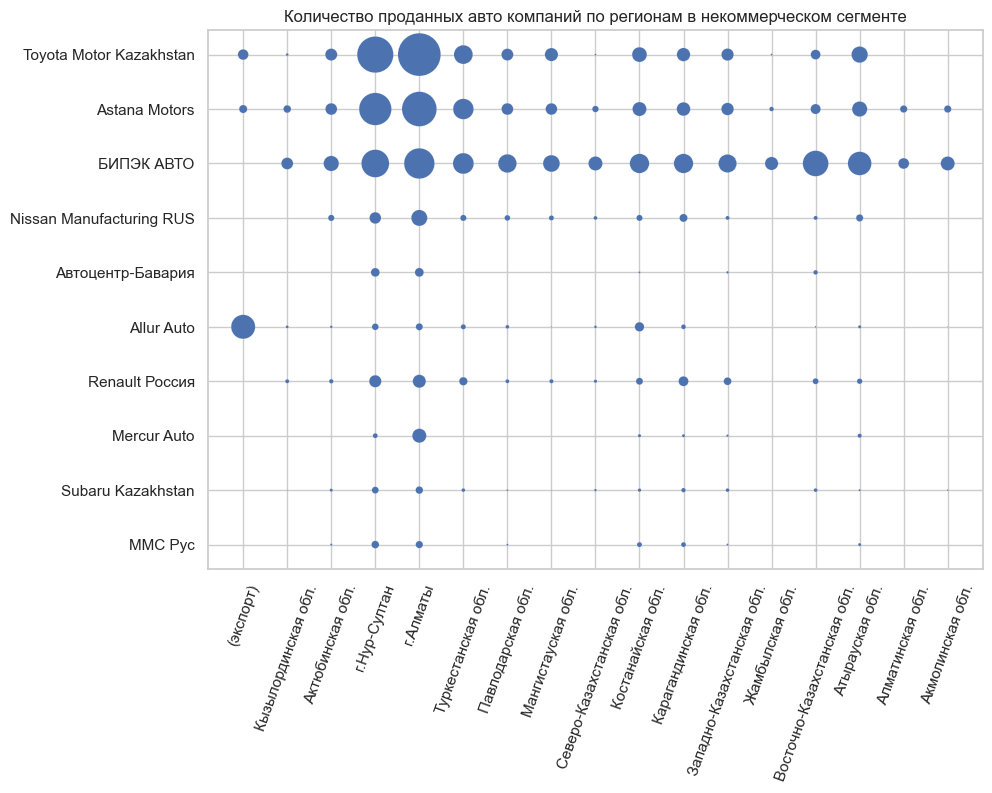

In [387]:
company_n_regions(top_10_nc_comps_by_rev, non_commercial,\
                  'Количество проданных авто компаний по регионам в некоммерческом сегменте')

Больше всего продаж в Астану (бывш. Нур-Султан) и Алматы совершили 3 лидера рынка. Лидером продаж в провинциальные регионы является БИПЭК АВТО. Лидером по экспорту является автоцентр Allur Auto.

Составим портрет типичных некоммерческих авто в зависимости от ценовой категории в виде таблицы.

Поскольку в датафрейме есть заказы с несколькими авто, агрегация по исходным данным может оказаться неточной. Необходимо создать датафрейм по принципу один автомобиль - одна запись.

In [391]:
# создадим такой датафрейм в переменной non_commercial_expanded
non_commercial_expanded = non_commercial[['brand', 'model','model_year','country','fuel', 'engine_size','drive_type'\
    ,'segment','transmission','price_category']].loc[non_commercial.index.repeat(non_commercial['amount'])]

In [392]:
# проверим работу функции
non_commercial_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48629 entries, 0 to 39950
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           48629 non-null  object 
 1   model           48629 non-null  object 
 2   model_year      47595 non-null  Int16  
 3   country         48629 non-null  object 
 4   fuel            46148 non-null  object 
 5   engine_size     38416 non-null  float64
 6   drive_type      47168 non-null  object 
 7   segment         48629 non-null  object 
 8   transmission    48629 non-null  object 
 9   price_category  48629 non-null  object 
dtypes: Int16(1), float64(1), object(8)
memory usage: 3.8+ MB


In [393]:
# создаем сводную таблицу
portrait = non_commercial_expanded.query('drive_type != "2wd"').groupby('price_category').agg({'brand': pd.Series.mode,\
    'model':pd.Series.mode,'model_year': pd.Series.mode, 'country':pd.Series.mode, 'fuel': pd.Series.mode,\
    'engine_size': 'median', 'transmission': pd.Series.mode, 'drive_type': pd.Series.mode, 'segment': pd.Series.mode}).T
index = ['Марка','Модель','Год производства','Страна производства','Топливо','Объем двигателя', 'Тип КП', 'Привод'\
    ,'Сегмент']
portrait.index = index

In [394]:
portrait

price_category,бюджетный,люкс,премиум,средний
Марка,Lada,Toyota,Toyota,Hyundai
Модель,Lada granta,Toyota lc200,Toyota lc prado,Toyota camry
Год производства,2019,2019,2019,2019
Страна производства,Республика Казахстан,Япония,Япония,Республика Казахстан
Топливо,F,F,F,F
Объем двигателя,1.6,4.6,2.7,2.0
Тип КП,механика,авто,авто,авто
Привод,передний,полный,полный,передний
Сегмент,Легковые автомобили,Внедорожники,Внедорожники,Легковые автомобили


Таким образом, типичный автомобиль **бюджетной ценовой категории** был произведен в Казахстане, имеет объем двигателя 1,6 литра, передний привод, механическую КП и относится к легковым авто. Типичная модель авто данного сегмента: Lada Granta.

Типичный автомобиль **средней ценовой категории** был произведен в Казахстане, имеет объем двигателя 2,0 литра, передний привод, автоматическую КП относится к легковым автомобилям. Типичная модель авто: Toyota Camry.

**Премиальная категория** характеризуется производством в Японии, объемом двигателя 2,7 литров, полным приводом, автоматической КП. Автомобили данной ценовой категории как правило являются внедорожниками. Типичная модель авто: Toyota Land Cruiser Prado.

Типичные автомобили **люксовой ценовой категории** имеют те же признаки, что и премиальные, однако имеют больший медианный объем двигателя: 4,6 литра. Типичный представитель: Toyota Land Cruiser 200.

Для автомобилей характерны общий год производства (2019) и бензиновый двигатель, вне зависимости от ценовой категории.

Определим 5 самых продаваемых авто в каждом ценовом сегменте.

In [397]:
def top_5_cars_by_segment (data, title):
    fig, axs = plt.subplots(2,2, figsize = (12,7))
    axs = axs.flatten()
    for i,c in enumerate(data['price_category'].unique()):
        category = data[data['price_category'] == c].groupby('model')['amount'].sum().reset_index()
        category = category.sort_values(by = 'amount', ascending = False).head()
        sns.barplot(category, x = 'amount', y = 'model', ax = axs[i])
        for ax in axs:
            ax.set(xlabel = 'Количество', ylabel = '')
        axs[i].set_title(f'{c}')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

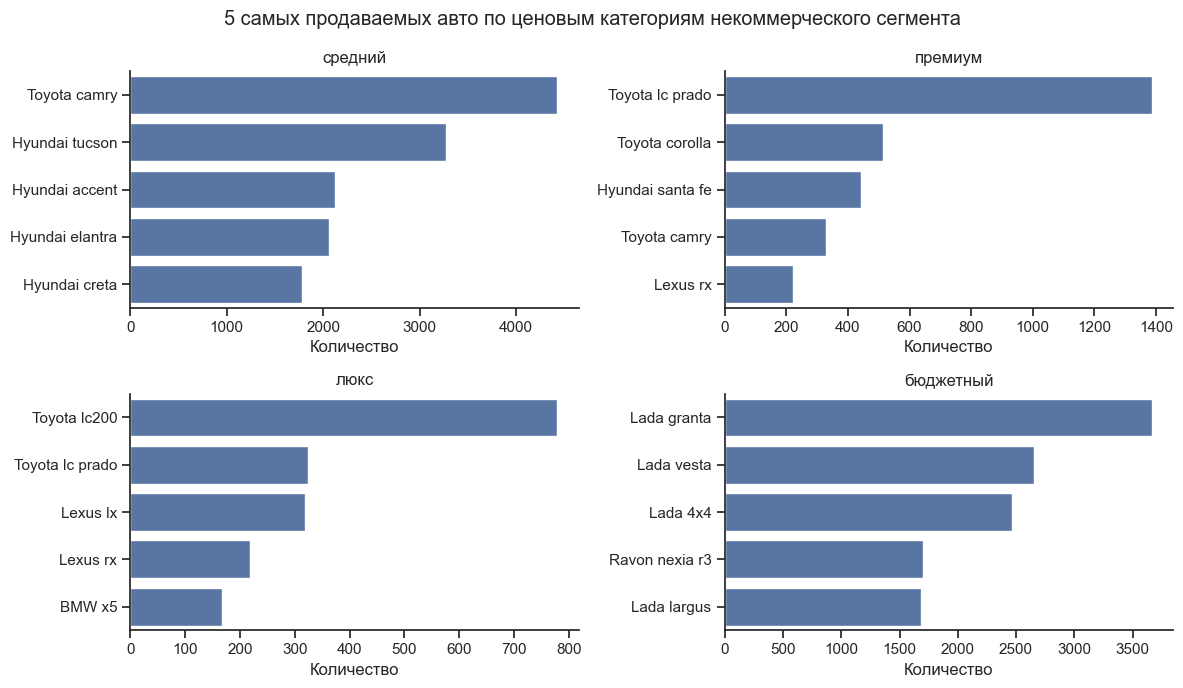

In [398]:
top_5_cars_by_segment(non_commercial,'5 самых продаваемых авто по ценовым категориям некоммерческого сегмента')

Самые продаваемые бюджетные автомобили: Lada Granta, Lada Vesta, Lada 4x4, Ravfon Nexia R3 и Lada Largus.

Cамые продаваемые авто среднего ценового сегмента: Toyota Camry, Hyundai Tucson, Hyundai Accent, Hyundai Elantra, Hyundai Creta.

Самые продаваемые авто премиального ценового сегмента: Toyota Land Cruiser Prado, Toyota Corolla, Hyundai Santa Fe, Toyota Camry, Lexus RX.

Самые продаваемые люксовые авто: Toyota Land Cruiser 200, Toyota Land Cruiser Prado, Lexus LX, Lexus RX, BMW X5.

#### Вывод по разделу

Были определены самые успешные автоцентры сегмента по выручке (Toyota Motors, Astana Motors, БИПЭК АВТО). Самые продаваемые классы автомобилей в сегменте: легковые авто, за ними идут внедорожники. Динамика продаж повторяет динамику по рынку в целом. Определены лидеры продаж по регионам - Алмата и Нур-Султан (Астана).

Проведена категоризация цен авто на бюджетную, среднюю, премиальную и люксовую. Выяснено, что наибольшую прибыль за исследуемый период принес средний сегмент. Для каждого сегмента составлен портрет типичного авто и 5 самых продаваемых автомобилей.

Проведена детализация выручки 10 самых успешных автоцентров по сегментам и количества проданных авто по регионам.

### Анализ рынка коммерческих авто

Определим лидеров по продажам в коммерческом сегменте.

In [404]:
# топ 10 по выручке
top_10_com_comps_by_rev = commercial.groupby('company')['order_price, mln USD'].sum().reset_index()
top_10_com_comps_by_rev = top_10_com_comps_by_rev.sort_values(by = 'order_price, mln USD', ascending = False).head(10)
# топ 10 по количеству
top_10_com_comps_by_qty = commercial.groupby('company')['amount'].sum().reset_index()
top_10_com_comps_by_qty = top_10_com_comps_by_qty.sort_values(by = 'amount', ascending = False).head(10)

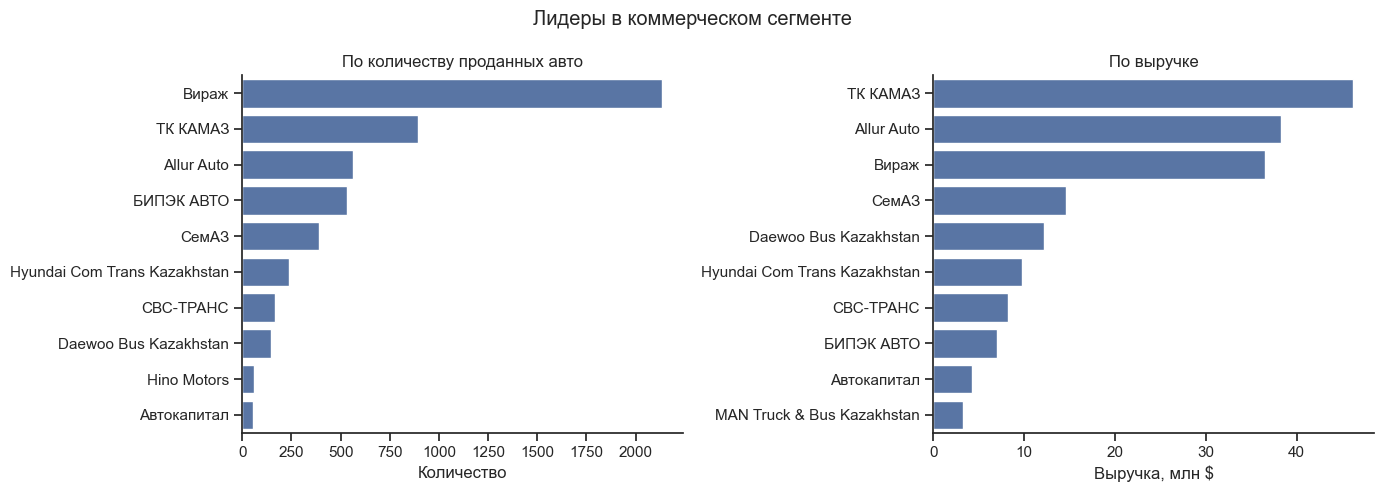

In [405]:
top_10_plot(top_10_com_comps_by_qty, top_10_com_comps_by_rev,'Лидеры в коммерческом сегменте')

Явный лидер по количеству проданных автомобилей в данном сегменте - Вираж; также этот автоцентр входит в тройку лидеров по выручке вместе с ТК КАМАЗ и Allur Auto.

Проанализируем динамику продаж.

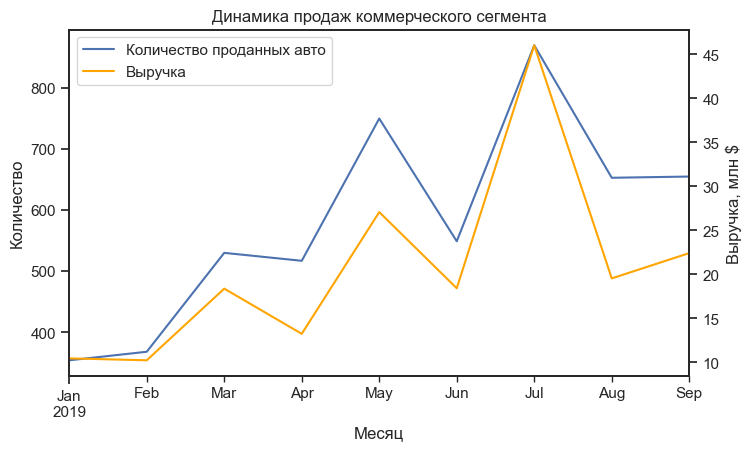

In [408]:
month_qty = commercial.groupby('date')['amount'].sum()
month_rev = commercial.groupby('date')['order_price, mln USD'].sum()
two_axes_linear(month_qty, month_rev, title = 'Динамика продаж коммерческого сегмента')

В коммерческом сегменте динамика продаж автомобилей отличается от таковой у некоммерческого сегмента. Если в некоммерческом сегменте наблюдался плавный рост продаж по месяцам с марта по июнь, то здесь рост скачкообразный, с резким повышением/понижением в каждом месяце с марта по сентябрь.

Возможно на такую картину влияют показатели определенных автоцентров. Проверим это.

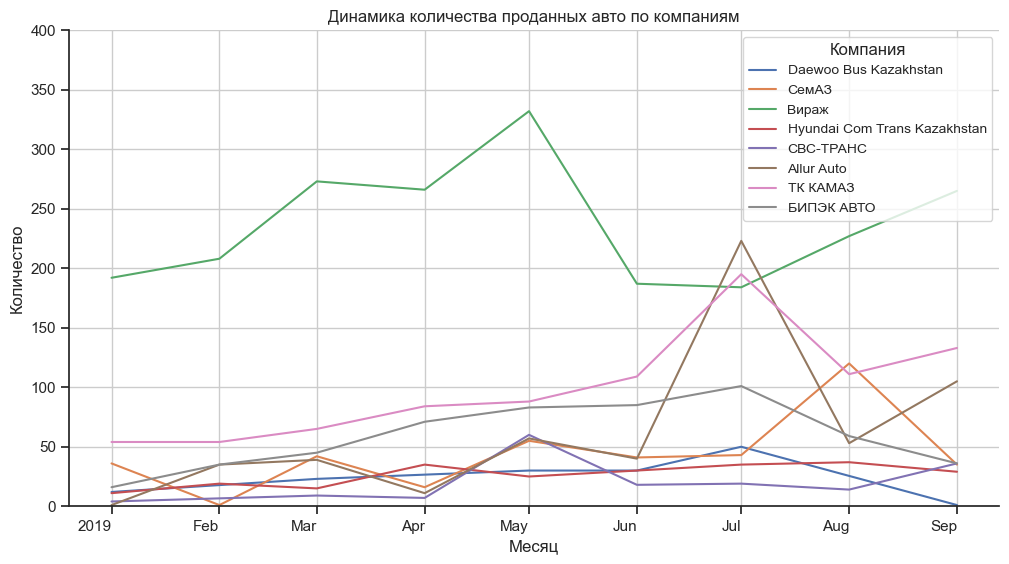

In [411]:
plt.figure(figsize = (12,7))
for c in commercial['company'].unique():
    data = commercial[commercial['company'] == c]
    data = data.groupby('date')['amount'].sum()
    if data.sum() > 100:
        ax = data.plot(label = c, grid = True)
        plt.xticks(rotation = 0)
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_formatter(formatter)
plt.legend(loc = 'upper right', title = 'Компания', fontsize = 10)
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.title('Динамика количества проданных авто по компаниям')
plt.ylim(0,400)
plt.show()

На показатели сегмента с апреля по июль повлияли показатели лидера рынка - автоцентра ВИРАЖ. Когда у него поднимались продажи, продажи поднимались у сегмента рынка в целом и наоборот. Однако пик продаж в августе произошел уже не из-за данного автоцентра, а из-за роста продаж в таких центрах как Allur Auto, ТК КАМАЗ, БИПЭК АВТО и Daewoo Bus Kazakhstan.

Посмотрим как продаются коммерческие авто в зависимости от ценовой категории.

Проведем категоризацию цен.

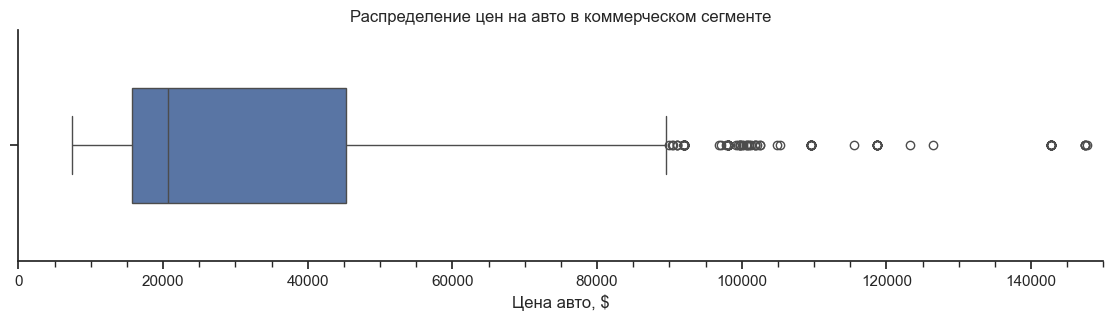

In [415]:
plt.figure(figsize = (14,3))
ax = sns.boxplot(commercial, x = 'car_price, USD', width = 0.5)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.xlabel('Цена авто, $')
plt.title('Распределение цен на авто в коммерческом сегменте')
plt.xlim(0,150000)
plt.show()

Данный сегмент имеет высокую дисперсию цен (для удобства чтения графика ось X ограничили до 150 000).

Автомобили ценой менее 15 тыс. будем считать принадлежащими к бюджетному сегменту, от 15 до 45 тыс. - к среднему, от 45 тыс. до 90 тыс. - к высокому, более 90 - к сверхвысокому.

In [417]:
def commercial_price(row):
    if row <= 15000:
        return 'бюджетный'
    elif row > 15000 and row <= 45000:
        return 'средний'
    elif row > 45000 and row <= 90000:
        return 'высокий'
    elif row > 90000:
        return 'сверхвысокий'
    else:
        pass

In [418]:
commercial['price_category'] = commercial['car_price, USD'].apply(commercial_price)

Проверим работу функции.

In [420]:
commercial[['car_price, USD','price_category']].sample(5)

,"car_price, USD",price_category
2053,19609.21090,средний
39006,20938.75648,средний
1010,18202.98421,средний
39784,80219.49915,высокий
15752,63670.46191,высокий


In [421]:
commercial['price_category'].unique()

array(['сверхвысокий', 'высокий', 'средний', 'бюджетный'], dtype=object)

Цены успешно категоризованы.

In [423]:
com_sales = commercial.groupby('price_category').agg({'amount':'sum', 'order_price, mln USD':'sum'})
com_sales = com_sales.sort_values(by = 'amount', ascending = False)

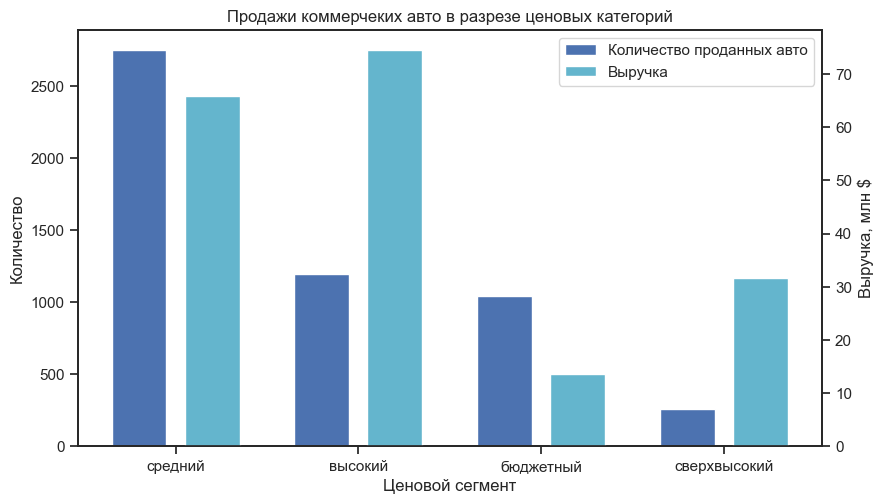

In [424]:
two_axes_plot(com_sales, (9,5))
plt.title('Продажи коммерчеких авто в разрезе ценовых категорий')
plt.show()

Самый популярный по продажам средняя ценовая категория, за ней идут высокая и бюджетная, меньше всего продаются автомобили сверхвысокой категории.
По выручке лидируют автомобили высокой категории, немного отстает средняя, затем идут автомобили сверхвысокой категории и на последнем месте - бюджетная.

Составим портрет автомобиля каждой ценовой категории.

In [427]:
# создадим датафрейм по типу "один автомобиль - одна строка"
commercial_expanded = commercial[['brand', 'model','model_year','country','fuel', 'engine_size','drive_type','segment'\
    ,'transmission','price_category']].loc[commercial.index.repeat(commercial['amount'])]

In [428]:
# проверим работу функции
print(f'Длина датафрейма commercial: {len(commercial)} строк,\
датафрейма commercial_expanded: {len(commercial_expanded)} строк')

Длина датафрейма commercial: 4328 строк,датафрейма commercial_expanded: 5246 строк


Успешно.

In [430]:
# создаем сводную таблицу
com_portrait = commercial_expanded.query('drive_type != "2wd"').groupby('price_category').agg({'brand':\
    pd.Series.mode,'model':pd.Series.mode,'model_year': pd.Series.mode, 'country':pd.Series.mode, \
    'fuel': pd.Series.mode, 'engine_size': 'median', 'transmission': pd.Series.mode, 'drive_type': pd.Series.mode}).T
index = ['Марка','Модель','Год производства','Страна производства','Топливо','Объем двигателя', 'Тип КП', 'Привод']
com_portrait.index = index

In [431]:
com_portrait

price_category,бюджетный,высокий,сверхвысокий,средний
Марка,UAZ,KAMAZ,MAN,GAZ
Модель,UAZ 3909,KAMAZ 43118,MAN tg,GAZ 3302
Год производства,2018,2019,2019,2019
Страна производства,Российская Федерация,Республика Казахстан,Германия,Российская Федерация
Топливо,F,D,D,F
Объем двигателя,2.7,3.8,10.5,2.7
Тип КП,механика,механика,авто,механика
Привод,полный,полный,задний,задний


Портрет автомобиля **бюджетной категории:** произведен в 2018 году в России, с бензиновым двигателем, с медианным объемом двигателя 2.7 л, с автоматической КП и полным приводом. Самый популярный представитель: UAZ 3909.

Автомобиль **средней категории**: произведен в 2019 году в России, с бензиновым двигателем объемом 2,7 л, с автоматической КП и задним приводом. Самый популярный представитель: GAZ 3302.

Автомобиль **высокой ценовой категории** произведен в 2019 году в Казахстане, с дизельным двигателем объемом 3,8 л, с механической КП и полным приводом. Самый популярный представитель сегмента: KAMAZ 43118.

Портрет автомобиля **сверхвысокой категории:** произведен в 2019 году в Германии, с дизельным двигателем обемом 10,5 литров, с автоматической коробкой передач и задним приводом. Самый популярный представитель: MAN tg.

Посмотрим на продажи ценовых категорий по автоцентрам.

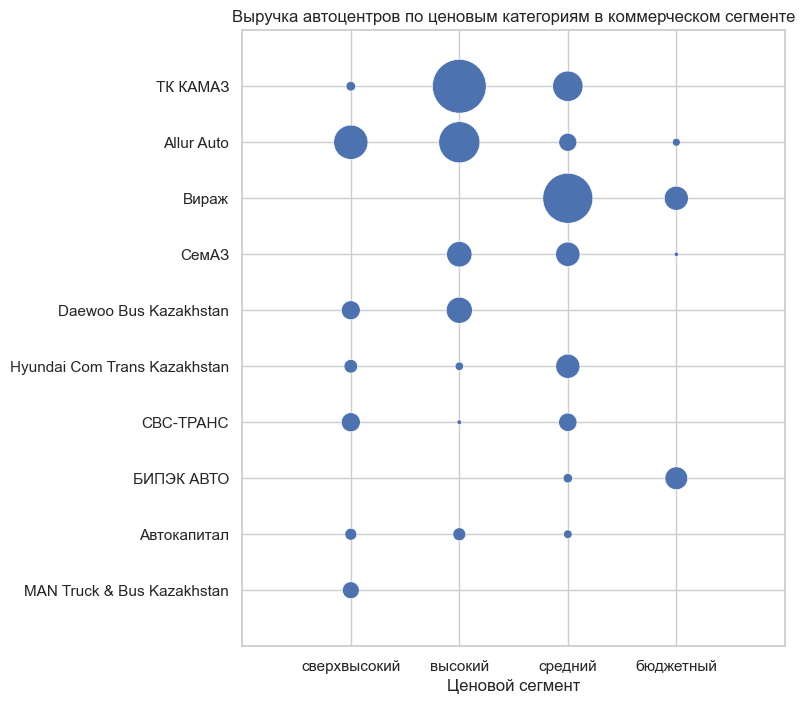

In [434]:
company_n_segment(top_10_com_comps_by_rev, commercial,\
    'Выручка автоцентров по ценовым категориям в коммерческом сегменте')

За исследуемый период больше всего авто бюджетного сегмента продали автоцентры вираж и БИПЭК АВТО, также второй центр является лидером продаж среднего сегмента. Лидерами продаж высокой ценовой категории являются лидеры продаж коммерческого сегмента в целом: ТК КАМАЗ и Allur auto, также высокие продажи в данном сегменте у СемАЗ и Daewoo Bus Kazakhstan. Лидером продаж в сверхвысокой категории является Allur Auto.

Проанализируем в какие города чаще продавались коммерческие авто.

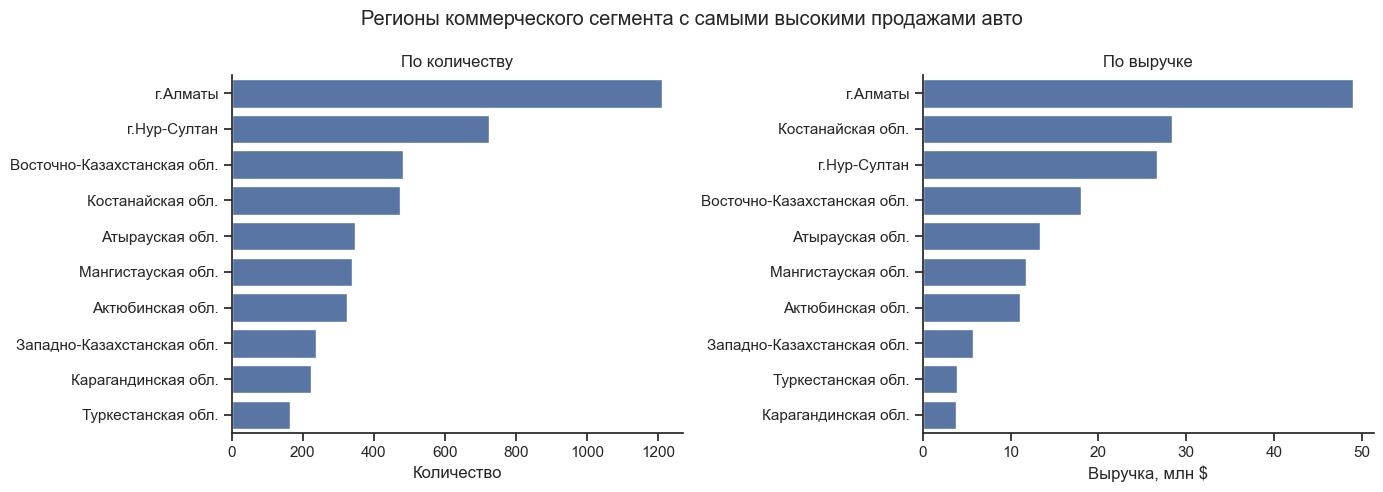

In [437]:
top_regions(commercial, 'Регионы коммерческого сегмента с самыми высокими продажами авто')

Костанайская область обогнала столицу по выручке и занимает второе место, при этом занимая по количеству четвертое место. Лидер по обоим метрикам - Алматы.

Проанализируем продажи 10 самых прибыльных автоцентров по регионам.

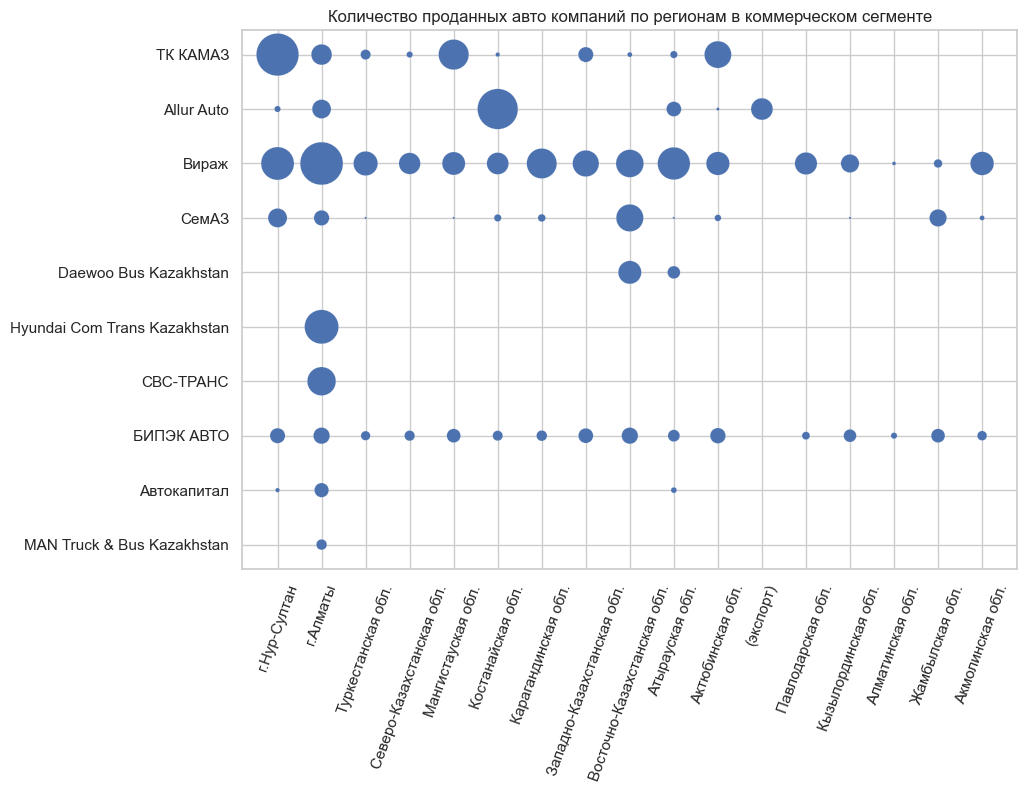

In [440]:
company_n_regions(top_10_com_comps_by_rev, commercial,\
    'Количество проданных авто компаний по регионам в коммерческом сегменте')

Лидер коммерческого сегмента ТК КАМАЗ продавал авто в столицу, Магнитстаускую, Актюбинскую, в меньшей степени в Алматы, Западно-Казахстанскую и некоторые другие области. Лидером продаж на экспорт является Allur Auto, также данный автоцентр является лидером продаж в Костанайскую область. Вираж и БИПЭК АВТО продавали автомобили во все регионы Казахстана.

Определим 5 самых продаваемых авто в каждой ценовой категории.

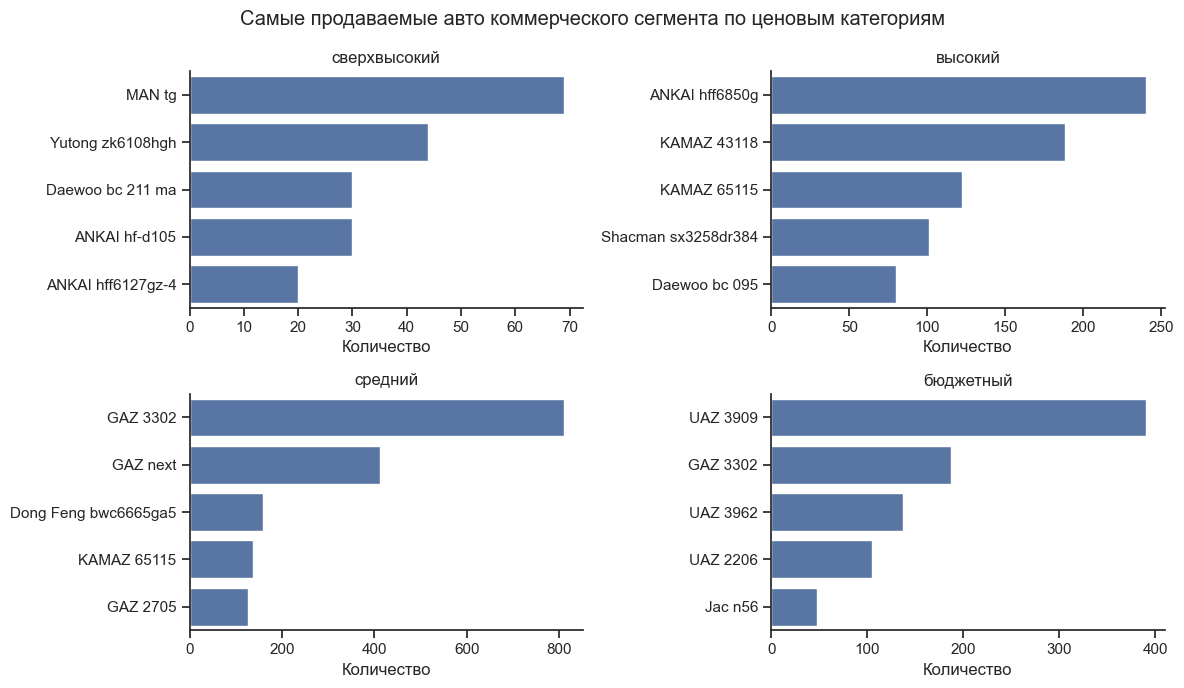

In [443]:
top_5_cars_by_segment(commercial, 'Самые продаваемые авто коммерческого сегмента по ценовым категориям')

Самые продаваемые автомобили для каждой ценовой категории представлены на графике.

Несмотря на то, что стоимость среднего чека не оказывает значимого влияния на выручку, в имеющихся данных средний чек коммерческого сегмента выше некоммерческого.
Проведем анализ данного признака для коммерческого сегмента.

Определим компании с самым высоким средним чеком.

In [447]:
avg_price = commercial.groupby('company')['order_price, mln USD'].mean().sort_values(ascending = False).head(10)

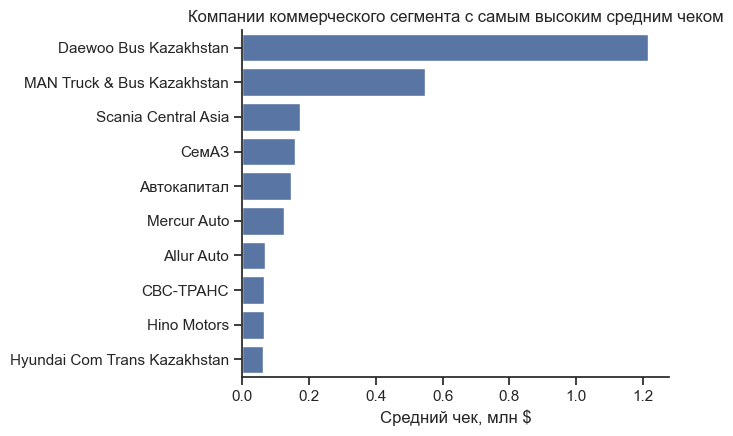

In [448]:
sns.barplot(avg_price, orient = 'y')
plt.xlabel('Средний чек, млн $')
plt.ylabel('')
plt.title('Компании коммерческого сегмента с самым высоким средним чеком')
plt.show()

Лидер авторынка Казахстана в 2019 г по средним чекам - Daewoo Bus Kazakhstan; за ним идет MAN Truck & Bus Kazakhstan.


При анализе корреляций была выяснена тесная взаимосвязь между средним чеком и количеством проданных автомобилей и умеренная между средникм чеком и средней цено авто. Визуализируем эту взаимосвязь на графике.

In [451]:
commercial_agg['avg_bill_leaders'] = (commercial_agg['company'] == 'Daewoo Bus Kazakhstan') | (commercial_agg['company']\
    == 'MAN Truck & Bus Kazakhstan')

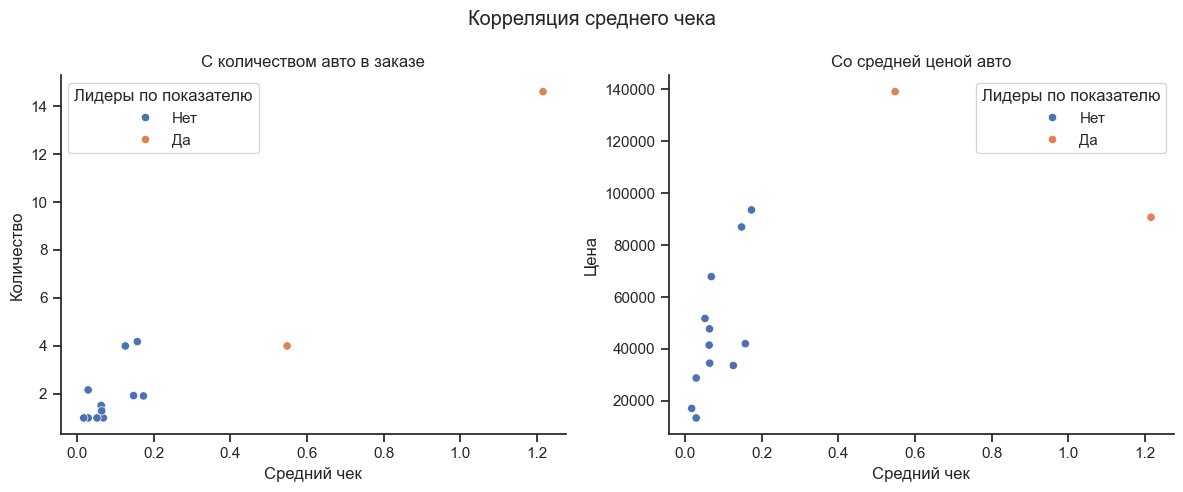

In [452]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
features = ['avg_amount','avg_car_price']
for i,f in enumerate(features):
    labels = ['Нет','Да']
    sns.scatterplot(commercial_agg, x = 'avg_bill', y = f, ax = axs[i], hue = 'avg_bill_leaders')
    axs[i].set_xlabel('Средний чек')
    axs[0].set_ylabel('Количество')
    axs[1].set_ylabel('Цена')
    axs[0].set_title('C количеством авто в заказе')
    axs[1].set_title('Со средней ценой авто')
for ax in axs:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles = handles, title = 'Лидеры по показателю', labels = ['Нет','Да'])
fig.suptitle('Корреляция среднего чека')
plt.tight_layout()
plt.show()

График демонстрирует взаимосвязь между средним чеком, количеством проданных авто в заказе и со средней ценой авто, что доказывает пример компании Daewoo Bus Kazakhstan и MAN Truck & Bus Kazakhstan.

#### Вывод по разделу

Определены компании-лидеры по продажам за исследуемый период: ТК КАМАЗ, Allur Auto, Вираж. Исследована динамика продаж в сегменте: на показание количества проданных авто большое влияние имел автоцентр ВИРАЖ. Определены компании с самым высоким средним чеком: Daewoo Bus Kazakhstan и MAN Truck & Bus Kazakhstan. 

Была проведена категоризация цен и определена прибыль по категориям: наибольшую прибыль принесла высокая ценовая ценовая категория. Составлен портрет автомобиля для каждой ценовой категории. Для каждого сегмента определены 5 самых продаваемых авто. Проведена детализация прибыли компаний по сегментам.

Определены регионы с самыми высокими продажами (Алматы и Нур-Султан). Проведена детализация продаж по компаниям и регионам.

## Показатели эффективности Mercur Auto

Еще раз выведем показатели продаж для десяти самых успешных по выручке автоцентров.

In [458]:
companies_list = top_10_companies_by_revenue.reset_index()['company'].to_list()
top_10_companies_by_revenue = df.query('company in @companies_list')[['company','order_price, mln USD']]
mean_rev = revenue_by_companies['order_price, mln USD'].mean()

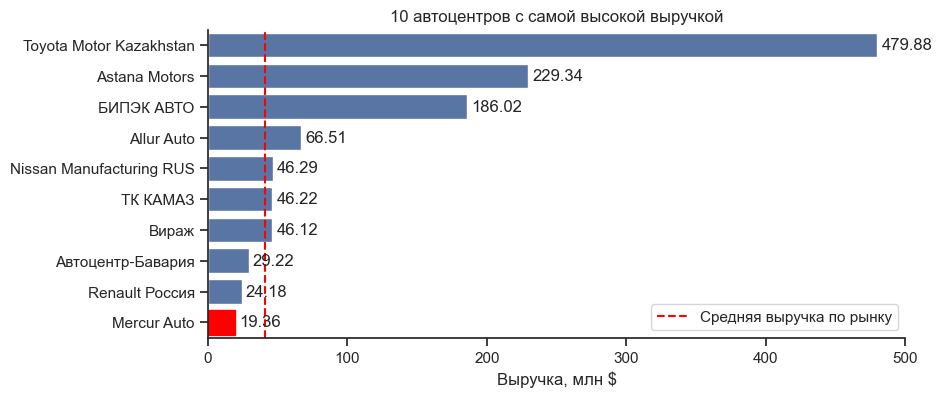

In [459]:
colors = ['red' if company == 'Mercur Auto' else 'C0' for company in companies_list]
plt.figure(figsize = (9,4))
ax = sns.barplot(top_10_companies_by_revenue, x = 'order_price, mln USD', y = 'company', estimator = 'sum',\
    order = companies_list, errorbar = None)
for i, bar in enumerate(ax.patches):
    if companies_list[i] == 'Mercur Auto':
        bar.set_color('red')
plt.axvline(mean_rev, linestyle = '--', color = 'red', label = 'Средняя выручка по рынку')
for c in ax.containers:
    ax.bar_label(c, fmt = '{:.2f}', padding = 3)
plt.legend(loc = 'lower right')
plt.xlim(0,500)
plt.xlabel('Выручка, млн $')
plt.ylabel('')
plt.title('10 автоцентров с самой высокой выручкой')
plt.show()

In [460]:
print(f'Автоцентр Меркур Авто занял 10-е место из {len(df['company'].unique())} по выручке среди всех автоцентров\
    в 2019 году.')
print(f'Данный показатель для компании составил 19,3 млн $, что ниже средней выручки по рынку.')

Автоцентр Меркур Авто занял 10-е место из 33 по выручке среди всех автоцентров    в 2019 году.
Данный показатель для компании составил 19,3 млн $, что ниже средней выручки по рынку.


Как выяснено ранее, большое влияние на показатель выручки имеет количество проданных автомобилей и то какие авто идут на продажу.

Проанализируем какое место на рынке по количеству проданных авто занимает исследуемый автоцентр

In [463]:
companies_by_count = df.groupby('company')['amount'].sum().sort_values(ascending=False).reset_index()
companies_by_count['rank'] = companies_by_count['amount'].rank(ascending = False).astype('int')

In [464]:
mercur_rank = companies_by_count.query('company == "Mercur Auto"')['rank'].iloc[0]
mercur_count = companies_by_count.query('company == "Mercur Auto"')['amount'].iloc[0]
print(f'По количеству проданных авто Меркур авто занимает {mercur_rank} место из 33.')
print(f'Компания за 2019 год продала {mercur_count} автомобилей, что почти в 3 раза меньше среднего по рынку.')

По количеству проданных авто Меркур авто занимает 11 место из 33.
Компания за 2019 год продала 650 автомобилей, что почти в 3 раза меньше среднего по рынку.


Для наглядности, визуализируем количество проданных автомобилей у Меркур Авто со средним количеством и лидером рынка по данному показателю.

In [466]:
amount_comparison = companies_by_count.loc[(companies_by_count['rank'] == 1) |\
    (companies_by_count['company'] == 'Mercur Auto')]

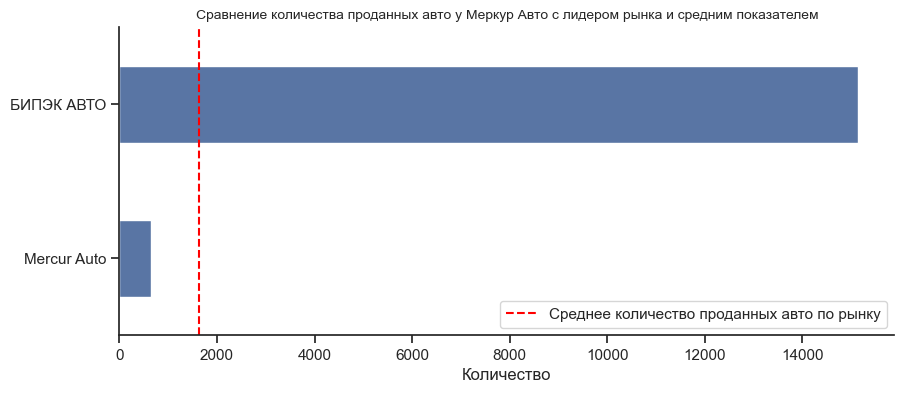

In [467]:
plt.figure(figsize = (10,4))
sns.barplot(amount_comparison, x = 'amount', y = 'company', width = 0.5)
plt.axvline(mean_amount, linestyle = '--', color = 'red', label = 'Среднее количество проданных авто по рынку')
plt.legend(loc = 'lower right')
plt.xlabel('Количество')
plt.ylabel('')
plt.title('Сравнение количества проданных авто у Меркур Авто с лидером рынка и средним показателем', fontsize = 10)
plt.show()

Посмотрим авто каких сегментов чаще всего продает Mercur Auto.

In [469]:
mercur = df[df['company'] == 'Mercur Auto']

In [470]:
mercur_segments = mercur.groupby('segment')['amount'].sum().reset_index()
mercur_segments.loc[mercur_segments['amount']<10, 'segment'] = 'Другие'
mercur_segments = mercur_segments.groupby('segment')['amount'].sum()

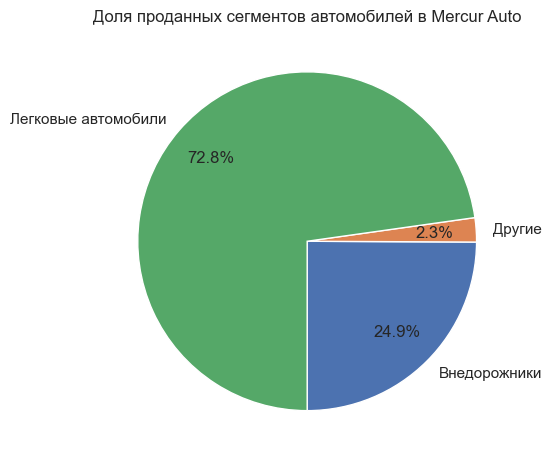

In [471]:
mercur_segments.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (5.5,5.5), pctdistance = 0.75, startangle = 270)
plt.title('Доля проданных сегментов автомобилей в Mercur Auto')
plt.ylabel('')
plt.show()

В Mercur Auto, как и в целом по рынку, преобладает продажа легковых авто и внедорожников.

Рассмотрим продажи Mercur Auto в разрезе ценовых категорий. Коммерческие авто исключим из анализа.

In [474]:
mercur = mercur.query('segment != "Коммерческие автомобили"')
mercur.loc[:, 'price_category'] = mercur.loc[:, 'car_price, USD'].apply(categorize_price)
sales_mercur = mercur.groupby('price_category').agg({'amount':'sum','order_price, mln USD':'sum'})
sales_mercur = sales_mercur.sort_values(by = 'amount', ascending = False)

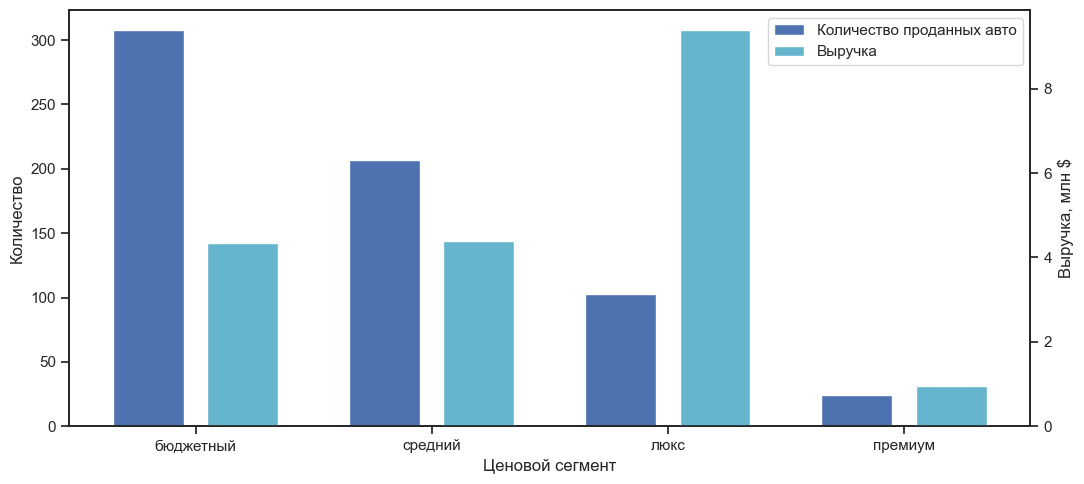

In [475]:
# применим ранее написанную функцию
sns.set_theme(style = 'ticks', palette = 'deep')
two_axes_plot(sales_mercur, (11,5))
plt.show()
sns.set_theme(style = 'ticks', palette = 'deep', rc = {"axes.spines.right": False, "axes.spines.top": False})

Продажи люксовой ценовой категории дали наибольшую выручку, несмотря на то, что по количеству проданных авто она на третьем месте. На первом месте по количеству проданных авто - бюджетный сегмент, но выручка у него примерно такая же, как и в среднем сегменте.

Узнаем как распределена выручка по брендам для Mercur Auto.

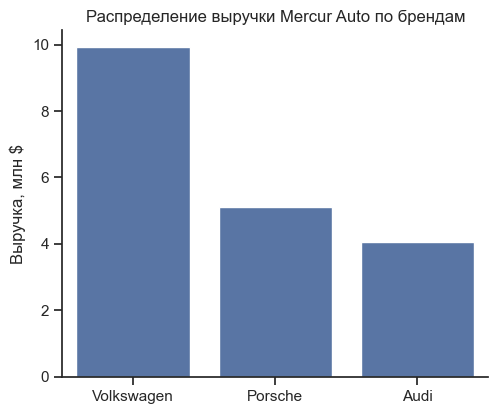

In [478]:
mercur_brand_revenue = mercur.groupby('brand')['order_price, mln USD'].sum().sort_values(ascending = False).reset_index()
sns.barplot(mercur_brand_revenue, x = 'brand', y = 'order_price, mln USD')
plt.xlabel('')
plt.ylabel('Выручка, млн $')
plt.title('Распределение выручки Mercur Auto по брендам')
plt.show()

Наибольшую выручку автоцентру приносит Volkswagen. Также можно увидеть, что компания специализируется продажей немецких автомобилей.

Выведем на экран 10 самых продаваемых машин в автоцентре.

In [481]:
# для каждой модели определяем ее ценовую категорию по моде
top_10_cars_mercur = mercur.groupby('model').agg({'amount':'sum','price_category': pd.Series.mode})
top_10_cars_mercur = top_10_cars_mercur.sort_values(by = 'amount', ascending = False).head(10).reset_index()
# для Volkswagen Teramont мода представляет с собой список из 2 категорий, поскольку эти категории представлены 
# в равной степени. Matplotlib при построении графика выдает ошибку, поэтому переименуем категорию для этой машины
top_10_cars_mercur.loc[top_10_cars_mercur['model'] == 'Volkswagen teramont', 'price_category'] = 'люкс/премиум'

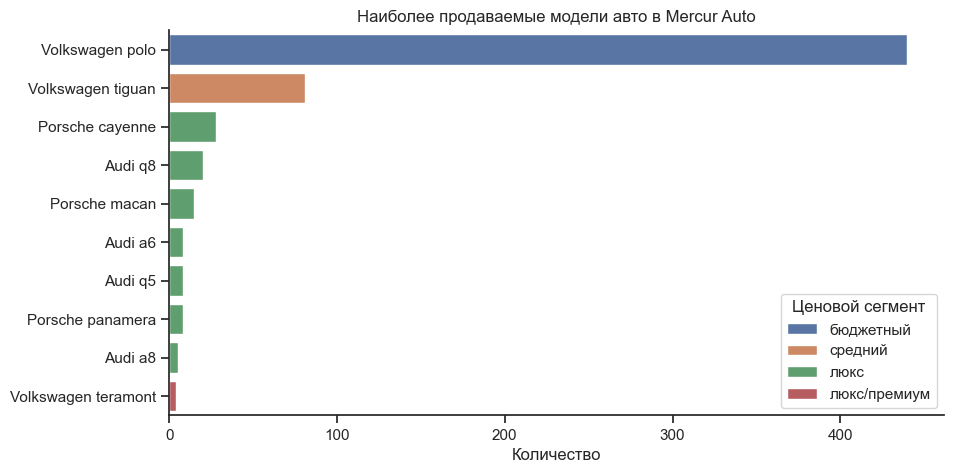

In [482]:
plt.figure(figsize = (10,5))
ax = sns.barplot(top_10_cars_mercur, x = 'amount', y = 'model', hue = 'price_category')
plt.title('Наиболее продаваемые модели авто в Mercur Auto')
plt.xlabel('Количество')
plt.ylabel('')
plt.legend(title = 'Ценовой сегмент')
plt.show()

На графике видно, что практически единственный продаваемый автомобиль бюджетного сегмента в автоцентре - Volkswagen Polo; также можно увидеть, что самый продаваемый сегмент на рынке - средний, практически не продается в компании.
8 из 10 моделей относятся к люксовому классу.

Похоже на то, что в автоцентре скудный ассортимент машин бюджетной, средней и премиальной ценовой категории

Посмотрим на ассортимент в виде сводной таблицы.

In [485]:
mercur_assortment = mercur.groupby(['price_category','model'])['amount'].sum().reset_index()
mercur_assortment.set_index(['price_category','model'])

amount
price_category model                         
бюджетный      Volkswagen jetta             1
               Volkswagen polo            306
               Volkswagen tiguan            1
люкс           Audi a6                      7
               Audi a7                      2
               Audi a8                      5
               Audi q5                      5
               Audi q7                      3
               Audi q8                     20
               Audi rs5                     1
               Porsche 911 carrera s        1
               Porsche cayenne             28
               Porsche macan               15
               Porsche panamera             8
               Volkswagen multivan          3
               Volkswagen teramont          2
               Volkswagen touareg           3
премиум        Audi a6                      1
               Audi q5                      3
               Volkswagen amarok            2
               Volkswagen teramont          2
               Volkswagen tiguan           14
               Volkswagen transporter       2
средний        Audi a3                      2
               Audi a4                      3
               Volkswagen jetta             2
               Volkswagen polo            134
               Volkswagen tiguan           66

Бюджетный сегмент представлен 3 автомобилями, средний - 5-ю, в премиальном - 6 авто, а в люксовом - 14. Ни в одном из сегментов нет авто, входящих в лидеры по продажам на рынке.

Узнаем какие модели автомобилей брендов Volkswagen, Porsche и Audi были самыми успешными на рынке некоммерческих авто для формирования реккомендаций по расширению ассортимента.

In [488]:
VAP = non_commercial.query('brand in ["Volkswagen","Audi","Porsche"]')
top10_VAP = VAP.groupby('model')['amount'].sum().sort_values(ascending = False).head(10)

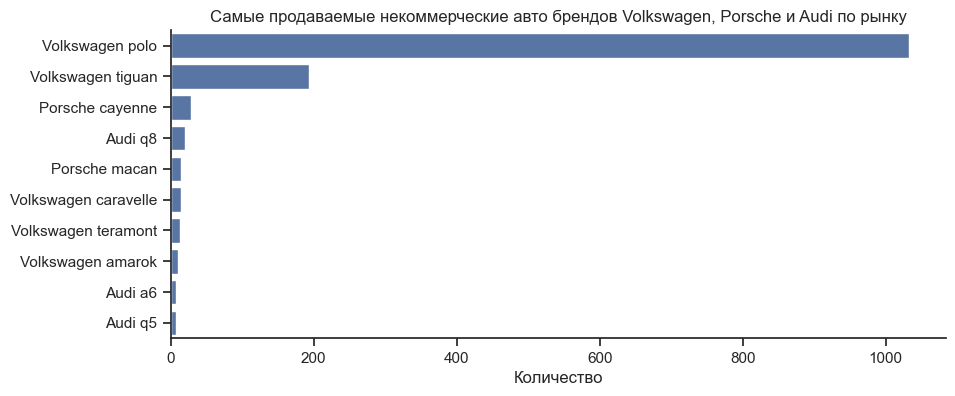

In [489]:
plt.figure(figsize = (10,4))
sns.barplot(top10_VAP, orient = 'y')
plt.xlabel('Количество')
plt.ylabel('')
plt.title('Самые продаваемые некоммерческие авто брендов Volkswagen, Porsche и Audi по рынку')
plt.show()

Здесь нет моделей, которые бы не продавались в Mercur Auto.

Расширим воронку. Составим топ-5 немецких некоммерческих моделей авто для каждого ценового сегмента.

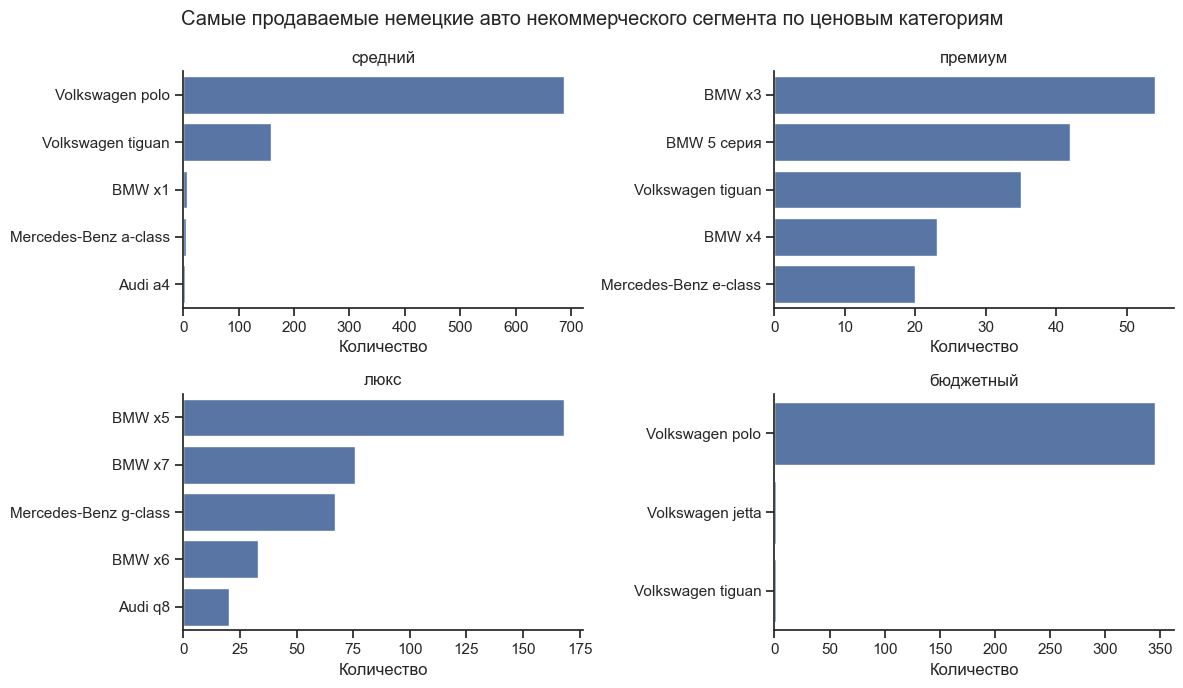

In [492]:
deutsch = non_commercial.query('brand in ["Audi", "BMW", "Mercedes-Benz", "Porshe", "Volkswagen"]')
top_5_cars_by_segment(deutsch, 'Самые продаваемые немецкие авто некоммерческого сегмента по ценовым категориям')

Можно расширить ассортимент автомобилями марок BMW и Mercedes. Для премиального сегмента это будут BMW X3, BMW 5 серия, BMW X4, Mercedes-Benz E-class; для люксового - BMW X5, BMW X7, Mercedes-Benz g-class, BMW X6. 

Проанализируем помесячную динамику прибыли.

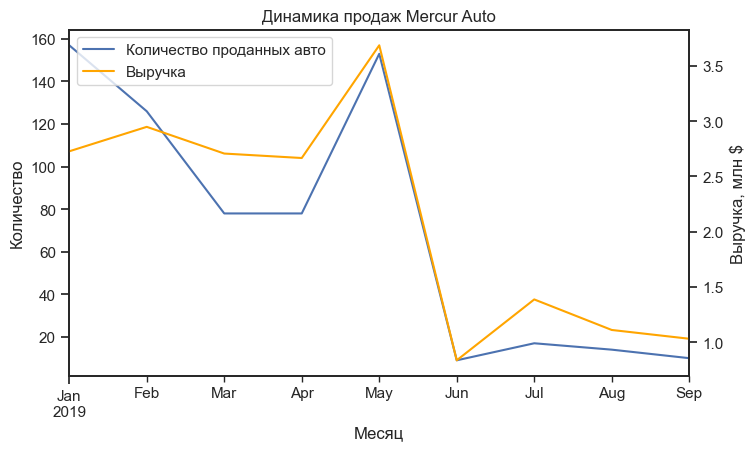

In [495]:
mercur_qty = mercur.groupby('date')['amount'].sum()
mercur_rev = mercur.groupby('date')['order_price, mln USD'].sum()
two_axes_linear(mercur_qty, mercur_rev, title = 'Динамика продаж Mercur Auto')

Серьезная просадка по продажам в июне. Необходимо разобраться в причинах.

Проанализируем динамику продаж в разрезе брендов.

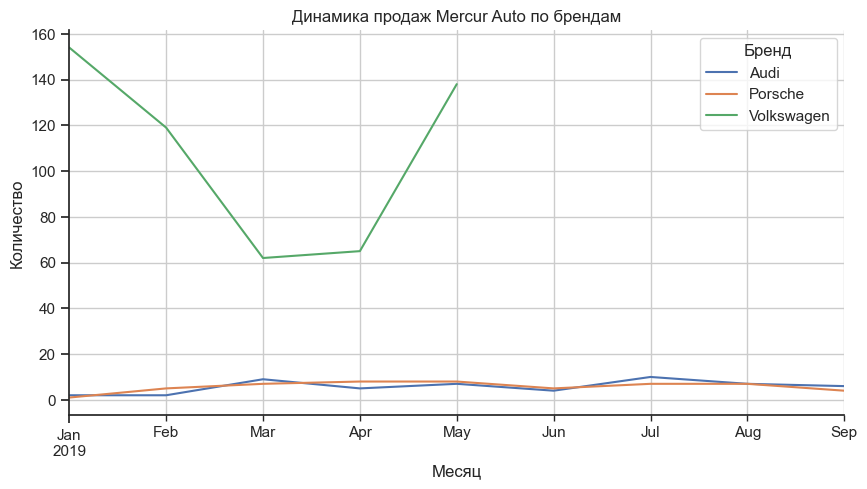

In [498]:
plt.figure(figsize = (10,5))
for b in mercur['brand'].unique():
    data = mercur[mercur['brand'] == b]
    data = data.groupby('date')['amount'].sum()
    ax = data.plot(label = b, grid = True)
    plt.grid(which = 'both', axis = 'x')
plt.legend(title = 'Бренд')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.title('Динамика продаж Mercur Auto по брендам')
plt.show()

Продажи бренда Volkswagen резко прекращаются в июне, что является причиной просадки продаж компании. Предполагаю, что компанией изначально было закуплено недостаточное количество автомобилей данного бренда.

Визуализируем динамику продаж в разрезе ценовых категорий.

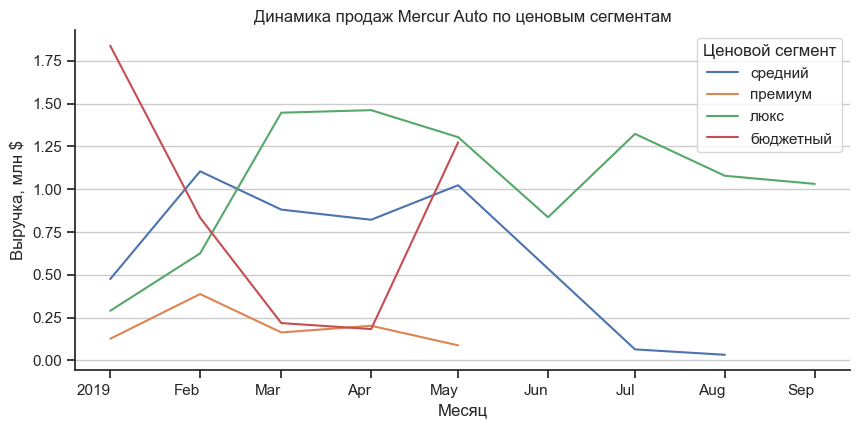

In [501]:
plt.figure(figsize = (10,5))
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
for b in mercur['price_category'].unique():
    data = mercur[mercur['price_category'] == b]
    data = data.groupby('date')['order_price, mln USD'].sum()
    ax = data.plot(label = b, grid = True)
    plt.grid(which = 'both', axis = 'x')
    ax.xaxis.set_major_formatter(formatter)
plt.legend(title = 'Ценовой сегмент')
plt.xticks(rotation = 0)
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн $')
plt.title('Динамика продаж Mercur Auto по ценовым сегментам')
plt.show()

После июньского исчезновения Volkswagen, единственным более менее стабильным источником дохода компании стали автомобили люксового класса. Идущие вверх доходы бюджетного сегмента, представленного исключительно Volkswagen, и премиального в июне резко прекратились. Доходы среднего резко начали снижаться в мае и через месяц были минимальны.

Исчезновением с продаж Volkswagen можно объяснить лидерство люксового сегмента в показателях выручки. Компании начиная с июня было нечего продавать.

Оценим масштаб потерь компании. Проанализируем динамику продаж Volkswagen по рынку.

In [504]:
no_mercur_volkswagen = non_commercial.query('company != "Mercur Auto" & brand == "Volkswagen"')

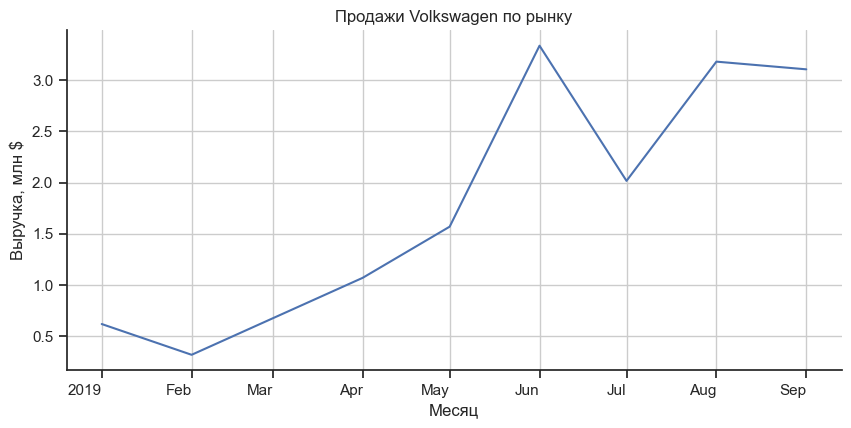

In [505]:
ax = no_mercur_volkswagen.groupby('date')['order_price, mln USD'].sum().plot(grid = True, figsize = (10,5))
ax.xaxis.set_major_formatter(formatter)
plt.title('Продажи Volkswagen по рынку')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн $')
plt.xticks(rotation = 0)
plt.show()

Продажи бренда периода с июня по сентябрь были выше, чем были до этого, что подтверждает болезненность потерь для Mercur Auto.

### Выводы и рекоммендации для Mercur Auto

Компания заняла 10 место из 33 на рынке по выручке с продаж автомобилей, данная метрика ниже средней по рынку. Связано это с относительно низким количеством проданных автомобилей, истощением запасов автомобилей Volkswagen, малым ассортиментом автомобилей в бюджетной, средней и премиальной ценовой категории.

Рекоммендую в первую очередь делать бо́льшие закупки автомобилей Volkswagen (в частности Polo), т.к. они хорошо продаются. 
Также можно расширить ассортимент автомобилей. Потенциал расширения для автомобилей марок Volkswagen, Audi и Porsche по сути исчерпан. Однако можно взять во внимание машины марок Mercedes и BMW. Например, можно расширить премиальный сегмент такими моделями как BMW X3, BMW 5 серия, BMW X4, Mercedes-Benz E-class, а люксовый - BMW X5, BMW X7, Mercedes-Benz g-class, BMW X6 (хотя у нее и так нормальные продажи).

Если отказаться от концепции продажи только немецкого автопрома, ассортимент средней категории можно расширить такими авто как Toyota Camry, Hyundai Tucson, Hyundai Accent, Hyundai Elantra, Hyundai Creta. Бюджетную стоит расширить такими авто, как Lada Granta, Lada Vesta, Lada 4x4, Ravon Nexia R3, Lada Largus, а премиальную - Toyota Land Cruiser Prado, Toyota Corolla, Hyundai Santa Fe, Toyota Camry и Lexus RX.

## Выводы (общие)

Была проведена работа по предобработке данных исходного датасета: удаление полей, переименование полей, приведение к нужному типу, обработка пропусков, обработка значений в полях, категоризация данных, добавление новых полей.

Был проведен исследовательский анализ данных. Было исследовано распределение цен на автомобили, сумм заказов, количества автомобилей в заказе, объемов двигателей. Были исследованы категориальные данные: автоцентры Казахстана, модели автомобилей, страны производители, типы КП, типы привода и т.д.

Также был проведен анализ рынка. Рынок был разбит на 2 сегмента: коммерческий и некоммерческий. Был определен объем рынка, средний чек, средняя цена авто и другие метрики как для рынка в целом, так и в разрезе сегментов. Выявлены корреляции между выручкой и количеством проданных авто, средним чеком и средним количеством проданных авто в заказе и средней ценой авто. Для каждого сегмента были определены автоцентры-лидеры продаж, динамика продаж, топ регионов. Автомобили были разделены по ценовым категориям. Для каждой категории определены продажи, составлены портреты. Для коммерческого сегмента определены компании с самым высоким среднм чеком.

Проведен анализ эффективности для автоцентра Mercur Auto. Сформированы выводы и рекоммендации для автоцентра с целью повышения дохода компании.